In [1]:
#install.packages(c("igraph","ggmap","ggplot2","ggraph","rjson","assertthat"))

In [ ]:
suppressMessages()

In [2]:
options(warn=-1)

In [3]:
library(assertthat)
library(dplyr)
library(purrr)
library(rjson)
library(ggraph)
library(ggmap)
library(ggplot2)
library(igraph)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.


Attaching package: 'igraph'


The following objects are masked from 'package:purrr':

    compose, simplify


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [4]:
santa_filename <- "los_angeles-censustracts-2019-4-All-MonthlyAggregate.csv"
filepath <- "santa_data"
santa_df <- read.csv(file.path(filepath, santa_filename),stringsAsFactors=FALSE)

In [5]:
head(santa_df)

,sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,296,10,1109.36,492.50,1021.90,1.48
2,28,186,10,1625.16,475.09,1565.73,1.30
3,758,972,12,953.55,269.46,916.93,1.33
4,1212,547,10,2053.39,648.63,1953.97,1.37
5,1299,1221,11,1467.54,539.64,1370.82,1.45
6,1197,2006,12,1213.18,630.86,1088.56,1.56


In [6]:
length(unique(c(santa_df$sourceid,santa_df$dstid)))

[1] 2653

In [7]:
nrow(santa_df)

[1] 5144062

In [8]:
geo_filename <- "los_angeles_censustracts.json"
geodata_json <- fromJSON(file=file.path(filepath, geo_filename))

In [9]:
attributes(geodata_json)

$names
[1] "type"     "features"

In [10]:
attributes(geodata_json$features[[1]])

$names
[1] "type"       "properties" "geometry"

In [11]:
attributes(geodata_json$features[[1]]$geometry)

$names
[1] "type"        "coordinates"

In [12]:
length(geodata_json$features)

[1] 2716

In [13]:
attributes(geodata_json$features[[1]]$geometry$coordinates)

NULL

In [14]:
attributes(geodata_json$features[[1]]$properties)

$names
[1] "MOVEMENT_ID"  "TRACT"        "DISPLAY_NAME"

In [15]:
geodata_json$features[[1]]$properties$DISPLAY_NAME

[1] "Census Tract 480302"

In [16]:
attributes(geodata_json$features[[1]]$geometry)

$names
[1] "type"        "coordinates"

In [17]:
length(geodata_json$features)

[1] 2716

In [18]:
edge_list <- santa_df[santa_df$month==12,c("sourceid","dstid","mean_travel_time")]

In [19]:
names(edge_list) <- c("src","dst","weight")

In [20]:
head(edge_list)

,src,dst,weight
,<int>,<int>,<dbl>
3,758,972,953.55
6,1197,2006,1213.18
7,2652,620,828.92
8,2427,2693,1742.80
9,2653,610,699.03
11,408,1508,648.42


In [21]:
location_graph <- graph_from_data_frame(edge_list,directed=FALSE)

In [22]:
V(location_graph)$centroid_x <- NA
V(location_graph)$centroid_y <- NA
V(location_graph)$location_id <- NA

In [23]:
key <- names(read.delim('C:/Users/lpott/Desktop/geolocation_key.txt'))
register_google(key = key)

In [24]:
for (feature in geodata_json$features){
    centroid <- colMeans(matrix(unlist(feature$geometry$coordinates),ncol=2,byrow=TRUE))
    vertex_id <- feature$properties$MOVEMENT_ID

    if (!(vertex_id %in% V(location_graph)$name)){
        next
    }
    #set.vertex.attribute(location_graph,'centroid',vertex_id,centroid)
    V(location_graph)[vertex_id]$location_id <- revgeocode(c(centroid[1],centroid[2]),output='address')
    V(location_graph)[vertex_id]$centroid_x <- centroid[1]
    V(location_graph)[vertex_id]$centroid_y <- centroid[2]
}

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1030955737705,-118.120533213115&key=xxx

Multiple addresses found, the first will be returned:

  405 N Granada Ave, Alhambra, CA 91801, USA

  823 E Grand Ave, Alhambra, CA 91801, USA

  400-420 N Granada Ave, Alhambra, CA 91801, USA

  Alhambra, CA 91801, USA

  Alhambra, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4V3H+6Q Alhambra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0964512105263,-118.137850631579&key=xxx

Multiple addresses found, the first will be returned:

  400 N Marguerita Ave, Alhambra, CA 91801, USA

  330 N Marguerita Ave, Alhambra, CA 91801, USA

  599-303 N Marguerita Ave, Alhambra, CA 91801, USA

  Alhambra, CA 91801, USA

  Alhambra, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3VW6+HV Alhambra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0962638636364,-118.131

  1998-1862 S Stoneman Ave, Alhambra, CA 91801, USA

  Alhambra, CA 91801, USA

  Alhambra, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3VCH+R6 Alhambra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0765908695652,-118.126370086957&key=xxx

Multiple addresses found, the first will be returned:

  1510 S 4th St, Alhambra, CA 91803, USA

  1514 S 4th St, Alhambra, CA 91803, USA

  1515 S 3rd St, Alhambra, CA 91803, USA

  1401-1599 S 4th St, Alhambra, CA 91803, USA

  Alhambra, CA 91803, USA

  Alhambra, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3VGF+JF Alhambra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0637109428571,-118.142371409524&key=xxx

Multiple addresses found, the first will be returned:

  2520 Snead Dr, Alhambra, CA 91803, USA

  2698-2412 Snead Dr, Alhambra, CA 91803, USA

  Alhambra, CA 91803, USA

  Alhambra, CA, USA

  Los Angeles Count

  9964 Garibaldi Ave, Temple City, CA 91780, USA

  9960 Garibaldi Ave, Temple City, CA 91780, USA

  9975-9965 Garibaldi Ave, Temple City, CA 91780, USA

  Temple City, CA 91780, USA

  Arcadia, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4W6W+GG Arcadia, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0954319230769,-117.998252092308&key=xxx

Multiple addresses found, the first will be returned:

  5358 Durfee Ave, El Monte, CA 91732, USA

  5340 Durfee Ave, El Monte, CA 91732, USA

  5318 Durfee Ave, El Monte, CA 91732, USA

  5399-5377 Durfee Ave, El Monte, CA 91732, USA

  Arcadia, CA 91006, USA

  Arcadia, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  32W2+5M Arcadia, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8769025151515,-118.083503727273&key=xxx

Multiple addresses found, the first will be returned:

  16905 Pioneer Blvd, Artesia, CA 90701, USA

  

Multiple addresses found, the first will be returned:

  504 E Renwick Rd, Azusa, CA 91702, USA

  400-502 E Renwick Rd, Azusa, CA 91702, USA

  Azusa, CA, USA

  Azusa, CA 91702, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  436X+83 Azusa, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0720847297297,-117.995355959459&key=xxx

Multiple addresses found, the first will be returned:

  3388 Barnes Ave, Baldwin Park, CA 91706, USA

  3383 Barnes Ave, Baldwin Park, CA 91706, USA

  3399-3359 Barnes Ave, Baldwin Park, CA 91706, USA

  Baldwin Park, CA, USA

  Baldwin Park, CA 91706, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  32C3+RV Baldwin Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0705006896552,-117.986603396552&key=xxx

Multiple addresses found, the first will be returned:

  3258 Frazier St, Baldwin Park, CA 91706, USA

  3250 Frazier St, Baldwin Park, CA 917

  Baldwin Park, CA, USA

  Baldwin Park, CA 91706, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  327M+82 Baldwin Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0637955616438,-117.976299150685&key=xxx

Multiple addresses found, the first will be returned:

  1249 Stichman Ave, Bassett, CA 91746, USA

  1244-1298 Stichman Ave, Bassett, CA 91746, USA

  Bassett, City of Industry, CA, USA

  La Puente, CA 91746, USA

  Baldwin Park, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  327F+GF Baldwin Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0591321666667,-118.003159166667&key=xxx

Multiple addresses found, the first will be returned:

  345 Cloverleaf Dr, La Puente, CA 91746, USA

  365 Cloverleaf Dr, Baldwin Park, CA 91706, USA

  365 Cloverleaf Dr, Bassett, CA 91746, USA

  Bassett, City of Industry, CA, USA

  La Puente, CA 91746, USA

  Baldwin Park, CA, 

Multiple addresses found, the first will be returned:

  10154 Hegel St, Bellflower, CA 90706, USA

  15426 Cornuta Ave, Bellflower, CA 90706, USA

  10146 Hegel St, Bellflower, CA 90706, USA

  10150 Hegel St, Bellflower, CA 90706, USA

  10199-10101 Hegel St, Bellflower, CA 90706, USA

  Bellflower, CA 90706, USA

  Bellflower, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VVVJ+5C Bellflower, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8861733409091,-118.119890863636&key=xxx

Multiple addresses found, the first will be returned:

  16305 Cornuta Ave, Bellflower, CA 90706, USA

  16301 Cornuta Ave, Bellflower, CA 90706, USA

  16310 Cornuta Ave, Bellflower, CA 90706, USA

  16307 Cornuta Ave, Bellflower, CA 90706, USA

  16306-16304 Cornuta Ave, Bellflower, CA 90706, USA

  Bellflower, CA 90706, USA

  Bellflower, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VVPJ+F2 Bellflower, CA, USA



  Bell Gardens, CA 90201, USA

  Cudahy, CA 90201, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XR9Q+JG Bell Gardens, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9571990566038,-118.166757471698&key=xxx

Multiple addresses found, the first will be returned:

  5645 Cecilia St, Bell Gardens, CA 90201, USA

  5616 Muller St, Bell Gardens, CA 90201, USA

  5600-5740 Cecilia St, Bell Gardens, CA 90201, USA

  Bell Gardens, CA 90201, USA

  Cudahy, CA 90201, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XR4M+V7 Bell Gardens, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9584545641026,-118.162336358974&key=xxx

Multiple addresses found, the first will be returned:

  5872 Muller St, Bell Gardens, CA 90201, USA

  5869 Muller St, Bell Gardens, CA 90201, USA

  5923-5861 Muller St, Bell Gardens, C

  Burbank, CA 91504, USA

  Burbank, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6M27+VP Burbank, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1956117977528,-118.339787831461&key=xxx

Multiple addresses found, the first will be returned:

  2615 Thornton Ave, Burbank, CA 91504, USA

  2406 N Naomi St, Burbank, CA 91504, USA

  2701 Thornton Ave, Burbank, CA 91504, USA

  2601-2699 Thornton Ave, Burbank, CA 91504, USA

  Burbank, CA 91504, USA

  Burbank, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5MW6+63 Burbank, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1943688021978,-118.327805065934&key=xxx

Multiple addresses found, the first will be returned:

  1801 Keeler St, Burbank, CA 91504, USA

  1807 Keeler St, Burbank, CA 91504, USA

  1849-1801 Morgan Ave, Burbank, CA 91504, USA

  Burbank, CA 91504, USA

  Burbank, CA, USA

  Los Angeles County, CA, U

  5M8V+X6 Burbank, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1719643793103,-118.310459793103&key=xxx

Multiple addresses found, the first will be returned:

  216 W Santa Anita Ave, Burbank, CA 91502, USA

  224 W Santa Anita Ave, Burbank, CA 91502, USA

  511 S Lake St, Burbank, CA 91502, USA

  201-213 W Santa Anita Ave, Burbank, CA 91502, USA

  Burbank, CA 91502, USA

  Burbank, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5MCQ+QR Burbank, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.19946615625,-118.354244546875&key=xxx

Multiple addresses found, the first will be returned:

  Unnamed Road, Burbank, CA 91505, USA

  Hollywood Burbank Airport (BUR), 2627 N Hollywood Way, Burbank, CA 91505, USA

  Burbank, CA 91505, USA

  North Hollywood, Los Angeles, CA, USA

  Burbank, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5JXW+Q8 Burbank, CA, USA

Source :

  Los Angeles County, CA, USA

  California, USA

  United States

  RP48+GW Carson, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8223894390244,-118.269944170732&key=xxx

Multiple addresses found, the first will be returned:

  22433 Neptune Ave, Carson, CA 90745, USA

  22798-22400 Neptune Ave, Carson, CA 90745, USA

  Long Beach, CA 90745, USA

  Carson, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RPCJ+X2 Carson, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8129312340426,-118.268134510638&key=xxx

Multiple addresses found, the first will be returned:

  402 E 234th St, Carson, CA 90745, USA

  23612-23600 Panama Ave, Carson, CA 90745, USA

  Long Beach, CA 90745, USA

  Carson, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RP7J+5P Carson, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8034706428571,-118.268779375&key=xxx

M

  13138 Hedda Dr, Cerritos, CA 90703, USA

  13100-13198 Hedda Dr, Cerritos, CA 90703, USA

  Artesia, CA 90703, USA

  Cerritos, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VW7X+V8 Cerritos, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8648939545455,-118.036979090909&key=xxx

Multiple addresses found, the first will be returned:

  6650 Montaire Pl, La Palma, CA 90623, USA

  6616 Montaire Pl, La Palma, CA 90623, USA

  Montaire Pl, La Palma, CA 90623, USA

  La Palma, CA, USA

  La Palma, CA 90623, USA

  Orange County, CA, USA

  California, USA

  United States

  VX77+X6 La Palma, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8514624210526,-118.052946964912&key=xxx

Multiple addresses found, the first will be returned:

  7651 El Rio Verde Cir, Buena Park, CA 90623, USA

  7651 El Rio Verde Cir, La Palma, CA 90623, USA

  7601-7699 El Rio Verde Cir, La Palma, CA 90623, USA

  La Palm

  WR53+HV Compton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9056647692308,-118.188759307692&key=xxx

Multiple addresses found, the first will be returned:

  12639 S Halo Dr, Compton, CA 90221, USA

  E McMillan St, Compton, CA 90221, USA

  East Compton, CA 90221, USA

  Compton, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WR46+7F Compton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9050261578947,-118.202115&key=xxx

Multiple addresses found, the first will be returned:

  1327 Adelon Ln, Compton, CA 90221, USA

  1902-1946 E Keeton St, Compton, CA 90221, USA

  East Compton, CA 90221, USA

  Compton, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WQ4X+25 Compton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9040424556962,-118.195785620253&key=xxx

Multiple addresses found, the first will be returned:

  4334 E Palmers

  548 W Tichenor St, Compton, CA 90220, USA

  1101-1299 S Center St, Compton, CA 90220, USA

  Compton, CA 90220, USA

  Compton, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VQP8+3J Compton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8780135769231,-118.229182794872&key=xxx

Multiple addresses found, the first will be returned:

  320 W Carob St, Compton, CA 90220, USA

  400 W Carob St, Compton, CA 90220, USA

  339-413 W Carob St, Compton, CA 90220, USA

  Compton, CA 90220, USA

  Compton, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VQHC+68 Compton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.871165928,-118.21889588&key=xxx

Multiple addresses found, the first will be returned:

  175 E Manville St, Compton, CA 90220, USA

  2 E Manville St, Compton, CA 90220, USA

  4-282 E Manville St, Compton, CA 90220, USA

  Compton, CA 90220, USA

  Compton, 

Multiple addresses found, the first will be returned:

  Citrus / Puente, Covina, CA 91723, USA

  350 S Citrus Ave, Covina, CA 91723, USA

  400 S Citrus Ave, Covina, CA 91723, USA

  400 E Puente St, Covina, CA 91723, USA

  104 W Puente St, Covina, CA 91723, USA

  377-401 S Citrus Ave, Covina, CA 91723, USA

  Covina, CA 91723, USA

  Covina, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  34M5+2X Covina, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.07637,-117.895643066667&key=xxx

Multiple addresses found, the first will be returned:

  744 S Albertson Ave, Covina, CA 91723, USA

  737 Aldenville St, Covina, CA 91723, USA

  601-799 S Albertson Ave, Covina, CA 91723, USA

  Covina, CA 91723, USA

  Covina, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  34G3+GP Covina, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9596262,-118.170309085714&key=xxx

Multiple 

Multiple addresses found, the first will be returned:

  900 Corporate Pointe, Culver City, CA 90230, USA

  167 Fox Hills Dr, Culver City, CA 90230, USA

  6053 Bristol Pkwy, Culver City, CA 90230, USA

  183-101 Fox Hills Dr, Culver City, CA 90230, USA

  Fox Hills, Culver City, CA, USA

  Los Angeles, CA 90230, USA

  Culver City, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XJP6+H4 Culver City, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9997096071429,-117.853659333333&key=xxx

Multiple addresses found, the first will be returned:

  20702 Moonlake St, Walnut, CA 91789, USA

  933-999 Glenwick Ave, Diamond Bar, CA 91789, USA

  Diamond Bar, CA, USA

  Walnut, CA 91789, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  X4XW+VG Diamond Bar, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9911961573034,-117.848799764045&key=xxx

Multiple addresses found, the first w

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9373295,-118.114127395833&key=xxx

Multiple addresses found, the first will be returned:

  10630 Woodruff Ave, Downey, CA 90241, USA

  9309 Buell St, Downey, CA 90241, USA

  10698-10600 Woodruff Ave, Downey, CA 90241, USA

  Downey, CA 90241, USA

  Downey, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WVPP+W8 Downey, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.921884020202,-118.126282858586&key=xxx

Multiple addresses found, the first will be returned:

  Unnamed Road, Downey, CA 90242, USA

  12107 Bellflower Blvd, Downey, CA 90242, USA

  12101-12275 Bellflower Blvd, Downey, CA 90242, USA

  Downey, CA 90242, USA

  Downey, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WVCF+QF Downey, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9258767076923,-118.118490569231&key=xxx

Multiple addre

  4800 Daleview Ave, El Monte, CA 91731, USA

  Apollo Ave, El Monte, CA 91731, USA

  El Monte, CA 91731, USA

  El Monte, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3XV9+P7 El Monte, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0971574418605,-118.02503655814&key=xxx

Multiple addresses found, the first will be returned:

  5015 Marshburn Ave, Arcadia, CA 91006, USA

  5000-5098 Marshburn Ave, Arcadia, CA 91006, USA

  North El Monte, CA, USA

  Arcadia, CA 91006, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3XWF+VX North El Monte, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0924208214286,-118.039311214286&key=xxx

Multiple addresses found, the first will be returned:

  10523 Lower Azusa Rd, Temple City, CA 91780, USA

  4802 Halifax Rd, Temple City, CA 91780, USA

  10531 Lower Azusa Rd, Temple City, CA 91780, USA

  Lower Azusa / Halifax, El Monte, CA 9

  Los Angeles County, CA, USA

  California, USA

  United States

  3X7P+7C El Monte, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0709319038462,-118.019101711538&key=xxx

Multiple addresses found, the first will be returned:

  11761 Sitka St, El Monte, CA 91732, USA

  3621 La Madera Ave, El Monte, CA 91732, USA

  3613-3601 La Madera Ave, El Monte, CA 91732, USA

  El Monte, CA 91731, USA

  El Monte, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3XCJ+99 El Monte, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0697390638298,-118.012785808511&key=xxx

Multiple addresses found, the first will be returned:

  3628 Penn Mar Ave, El Monte, CA 91732, USA

  3617 Penn Mar Ave, El Monte, CA 91732, USA

  3620-3634 Penn Mar Ave, El Monte, CA 91732, USA

  El Monte, CA 91732, USA

  El Monte, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3X9P+VV El Monte, CA, USA

S

  El Segundo, CA 90245, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WJ88+97 El Segundo, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9100023575419,-118.419927916201&key=xxx

Multiple addresses found, the first will be returned:

  300-998 Vista Del Mar, El Segundo, CA 90245, USA

  El Segundo, CA 90245, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WH6J+22 El Segundo, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8675359166667,-118.299286666667&key=xxx

Multiple addresses found, the first will be returned:

  17920 Brighton Way, Gardena, CA 90248, USA

  18120 Normandie Ave, Gardena, CA 90248, USA

  Normandie Ave, Gardena, CA 90248, USA

  17901 Brighton Way, Gardena, CA 90248, USA

  Gardena, CA 90248, USA

  Gardena, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VP92+27 Gardena, CA, USA

Source : https://maps.googleapis.com/maps/a

  38 Northwoods Ln, Glendale, CA 91214, USA

  3117 Montrose Ave, Glendale, CA 91214, USA

  Northwoods Ln, Glendale, CA 91214, USA

  Montrose Verdugo City, Glendale, CA, USA

  Glendale, CA 91214, USA

  Glendale, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6QC3+88 Glendale, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2077345502959,-118.235541538462&key=xxx

Multiple addresses found, the first will be returned:

  2602 Sycamore Ave, Montrose, CA 91020, USA

  3713 Rosemont Ave, Glendale, CA 91208, USA

  3721-3701 Rosemont Ave, Glendale, CA 91208, USA

  Montrose Verdugo City, Glendale, CA, USA

  Montrose, CA 91020, USA

  Glendale, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6Q57+3Q Glendale, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1950911960784,-118.242613843137&key=xxx

Multiple addresses found, the first will be returned:

  3207 Barnes Cir,

  1325 Grand Central Ave, Glendale, CA 91201, USA

  1435 Grand Central Ave, Glendale, CA 91201, USA

  1344 Grand Central Ave, Glendale, CA 91201, USA

  1344-1340 Grand Central Ave, Glendale, CA 91201, USA

  Grand Central, Glendale, CA 91201, USA

  Glendale, CA 91201, USA

  Glendale, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5P76+3W Glendale, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1604163793103,-118.298160396552&key=xxx

Multiple addresses found, the first will be returned:

  1608 Garden St, Glendale, CA 91201, USA

  1609 Victory Blvd, Glendale, CA 91201, USA

  1601 Victory Blvd, Glendale, CA 91201, USA

  1601-1699 Garden St, Glendale, CA 91201, USA

  Riverside Rancho, Glendale, CA 91201, USA

  Glendale, CA 91201, USA

  Glendale, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5P62+5P Glendale, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34

  436 Edison Pl, Glendale, CA 91204, USA

  Pacific - Edison, Glendale, CA 91204, USA

  Glendale, CA 91204, USA

  Glendale, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4PRQ+55 Glendale, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1302714637681,-118.258989478261&key=xxx

Multiple addresses found, the first will be returned:

  325 W Cypress St, Glendale, CA 91204, USA

  322 Magnolia Ave, Glendale, CA 91204, USA

  326 Magnolia Ave, Glendale, CA 91204, USA

  301-331 W Cypress St, Glendale, CA 91204, USA

  Tropico, Glendale, CA, USA

  Glendale, CA 91204, USA

  Glendale, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4PJR+4C Glendale, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1380226333333,-118.2488876&key=xxx

Multiple addresses found, the first will be returned:

  524 Raleigh St, Glendale, CA 91205, USA

  526 Raleigh St, Glendale, CA 91205, USA



Multiple addresses found, the first will be returned:

  546 W Baseline Rd, Glendora, CA 91740, USA

  599 W Baseline Rd, Glendora, CA 91740, USA

  Grand Ave, Glendora, CA 91740, USA

  Glendora, CA 91740, USA

  Glendora, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  44CG+FX Glendora, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1119320666667,-117.871898388889&key=xxx

Multiple addresses found, the first will be returned:

  441 W Kirkwall Rd, Glendora, CA 91740, USA

  1434 S Grand Ave, Glendora, CA 91740, USA

  301-499 W Kirkwall Rd, Glendora, CA 91740, USA

  Glendora, CA 91740, USA

  Charter Oak, Covina, CA, USA

  Glendora, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  446H+Q6 Glendora, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1070123636364,-117.881928727273&key=xxx

Multiple addresses found, the first will be returned:

  1003 W Arrow Hwy, Glen

  United States

  WJ4G+7C Hawthorne, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9085951168831,-118.357966519481&key=xxx

Multiple addresses found, the first will be returned:

  4617 W 136th St, Hawthorne, CA 90250, USA

  14120 Hawthorne Blvd, Hawthorne, CA 90250, USA

  4784-4600 W 136th St, Hawthorne, CA 90250, USA

  Hawthorne, CA, USA

  Hawthorne, CA 90250, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WJ5R+CR Hawthorne, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9136899142857,-118.347660314286&key=xxx

Multiple addresses found, the first will be returned:

  4137 W 132nd St, Hawthorne, CA 90250, USA

  4154-4100 W 130th St, Hawthorne, CA 90250, USA

  Hawthorne, CA, USA

  Hawthorne, CA 90250, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WM72+FW Hawthorne, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9047323913043,-118.3

  1075 7th St, Hermosa Beach, CA 90254, USA

  1052 8th St, Hermosa Beach, CA 90254, USA

  814-1098 7th St, Hermosa Beach, CA 90254, USA

  Hermosa Beach, CA 90254, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VJ66+9G Hermosa Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8585035754717,-118.398067132075&key=xxx

Multiple addresses found, the first will be returned:

  629 Manhattan Ave, Hermosa Beach, CA 90254, USA

  621 Manhattan Ave, Hermosa Beach, CA 90254, USA

  600-798 Manhattan Ave, Hermosa Beach, CA 90254, USA

  Hermosa Beach, CA 90254, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VJ52+CQ Hermosa Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1591881165049,-118.654899815534&key=xxx

Multiple addresses found, the first will be returned:

  24208 Bridle Trail Rd, Hidden Hills, CA 91302, USA

  24150 Hidden Ridge Rd, Hidden Hills, CA 91302, USA



  Huntington Park, CA, USA

  Huntington Park, CA 90255, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XQFV+V5 Huntington Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.98628645,-118.200895125&key=xxx

Multiple addresses found, the first will be returned:

  3553 E 60th Pl, Huntington Park, CA 90255, USA

  3605 E 60th Pl, Huntington Park, CA 90255, USA

  4399-3657 E 60th Pl, Huntington Park, CA 90255, USA

  Huntington Park, CA, USA

  Huntington Park, CA 90255, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XQPX+GJ Huntington Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9852255217391,-118.194510173913&key=xxx

Multiple addresses found, the first will be returned:

  6052 Corona Ave, Huntington Park, CA 90255, USA

  6026 Corona Ave, Huntington Park, CA 90255, USA

  6066-6028 Corona Ave, Huntington Park, CA 90255, USA

  Huntington Park, CA, USA

  Hunti

Multiple addresses found, the first will be returned:

  San Gabriel River Fwy, City of Industry, CA 91732, USA

  El Monte, CA 91732, USA

  City of Industry, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2XQH+63 City of Industry, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0313401875,-118.008054333333&key=xxx

Multiple addresses found, the first will be returned:

  13361 Crossroads Pkwy N, City of Industry, CA 91746, USA

  13361 Crossroads Pkwy N, City of Industry, CA 90601, USA

  Crossroads Pkwy N, City of Industry, CA 91746, USA

  La Puente, CA 91746, USA

  City of Industry, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2XJR+GQ City of Industry, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0160484285714,-117.975298428571&key=xxx

Multiple addresses found, the first will be returned:

  15157 Walbrook Dr, City of Industry, CA 91745, USA

  980 Turnb

  XJCX+F3 Inglewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9780060222222,-118.352910422222&key=xxx

Multiple addresses found, the first will be returned:

  415 E Brett St, Inglewood, CA 90302, USA

  403 E Brett St, Inglewood, CA 90302, USA

  1300-1398 Field Ave, Inglewood, CA 90302, USA

  Inglewood, CA 90302, USA

  Inglewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XJHW+6R Inglewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.97479344,-118.34171966&key=xxx

Multiple addresses found, the first will be returned:

  826 E 67th St, Inglewood, CA 90302, USA

  836 E 67th St, Inglewood, CA 90302, USA

  Unnamed Road, Inglewood, CA 90302, USA

  Inglewood, CA 90302, USA

  Morningside Park, Inglewood, CA, USA

  Inglewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XMF5+W8 Inglewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geoc

  3740 W 104th St, Inglewood, CA 90303, USA

  3744 W 104th St, Inglewood, CA 90303, USA

  3601-3799 W 104th St, Inglewood, CA 90303, USA

  Inglewood, CA 90303, USA

  Inglewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WMR6+J9 Inglewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9338306857143,-118.339424257143&key=xxx

Multiple addresses found, the first will be returned:

  3800 W 111th Pl, Inglewood, CA 90303, USA

  3810 W 111th Pl, Inglewood, CA 90303, USA

  3830-3800 W 111th Pl, Inglewood, CA 90303, USA

  Inglewood, CA 90303, USA

  Inglewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WMM6+G6 Inglewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9337140689655,-118.331442655172&key=xxx

Multiple addresses found, the first will be returned:

  3326 W 111th Pl, Inglewood, CA 90303, USA

  3330 W 111th Pl, Inglewood, CA 90303, USA

  3301

  La Habra, CA 90631, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  X25H+7W La Habra Heights, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8435424848485,-118.090616666667&key=xxx

Multiple addresses found, the first will be returned:

  20503 Sylvanwood Ave, Lakewood, CA 90715, USA

  San Gabriel River Fwy, Lakewood, CA 90715, USA

  Lakewood, CA 90715, USA

  Lakewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RWV5+CQ Lakewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.834545,-118.0889854&key=xxx

Multiple addresses found, the first will be returned:

  11424 214th St, Lakewood, CA 90715, USA

  11599-11301 214th St, Lakewood, CA 90715, USA

  Lakewood, CA 90715, USA

  Lakewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RWM6+RC Lakewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.838

  Paramount & Carson NE, Lakewood, CA 90712, USA

  2721 E Carson St, Lakewood, CA 90712, USA

  4118-4136 Paramount Blvd, Lakewood, CA 90712, USA

  Lakewood, CA 90712, USA

  Lakewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RRMR+56 Lakewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8518195185185,-118.165604814815&key=xxx

Multiple addresses found, the first will be returned:

  2125 Dashwood St, Lakewood, CA 90712, USA

  5234 Tri Bay Cir, Lakewood, CA 90712, USA

  2000-2298 Dashwood St, Lakewood, CA 90712, USA

  Bixby North, Long Beach, CA, USA

  Lakewood, CA 90712, USA

  Lakewood, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VR2M+PQ Lakewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.83901725,-118.16421875&key=xxx

Multiple addresses found, the first will be returned:

  4437 Deeboyar Ave, Lakewood, CA 90712, USA

  4426-4498 Deeboyar 

Multiple addresses found, the first will be returned:

  802 Rama Dr, La Puente, CA 91746, USA

  815 Sunkist Ave, La Puente, CA 91746, USA

  14175-14151 Homeward St, La Puente, CA 91746, USA

  La Puente, CA, USA

  La Puente, CA 91746, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  22XG+GX La Puente, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0430903055556,-117.975569805556&key=xxx

Multiple addresses found, the first will be returned:

  435 Sandia Ave, La Puente, CA 91746, USA

  499-417 Sandia Ave, La Puente, CA 91746, USA

  La Puente, CA, USA

  La Puente, CA 91746, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  22VF+6Q La Puente, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0338613823529,-117.957859852941&key=xxx

Multiple addresses found, the first will be returned:

  15221 Temple Ave, La Puente, CA 91744, USA

  601 N Unruh Ave, La Puente, CA 91744, USA


  Lomita, CA, USA

  Lomita, CA 90717, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QMWP+GR Lomita, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7979196923077,-118.323023269231&key=xxx

Multiple addresses found, the first will be returned:

  25007 Cypress St, Lomita, CA 90717, USA

  25001 Cypress St, Lomita, CA 90717, USA

  2302 250th St, Lomita, CA 90717, USA

  2305-2317 250th St, Lomita, CA 90717, USA

  Lomita, CA, USA

  Lomita, CA 90717, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QMXG+5Q Lomita, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7832487173913,-118.317861&key=xxx

Multiple addresses found, the first will be returned:

  14 Bridlewood Cir, Rolling Hills Estates, CA 90274, USA

  18 Bridlewood Cir, Rolling Hills Estates, CA 90274, USA

  Bridlewood Trail, Rolling Hills Estates, CA 90274, USA

  Rolling Hills Estates, CA, USA

  Rolling Hills, CA

Multiple addresses found, the first will be returned:

  301 E Cummings Ln, Long Beach, CA 90805, USA

  307 E Cummings Ln, Long Beach, CA 90805, USA

  6726-6750 Butler Ave, Long Beach, CA 90805, USA

  Freeway Circle, Long Beach, CA 90805, USA

  North Long Beach, Long Beach, CA, USA

  Long Beach, CA 90805, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VRG3+J6 Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8698525714286,-118.180207489796&key=xxx

Multiple addresses found, the first will be returned:

  6335 Lewis Ave, Long Beach, CA 90805, USA

  6327 Lewis Ave, Long Beach, CA 90805, USA

  6300-6398 Lewis Ave, Long Beach, CA 90805, USA

  Jordan, Long Beach, CA 90805, USA

  North Long Beach, Long Beach, CA, USA

  Long Beach, CA 90805, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VR99+WW Long Beach, CA, USA

Source : https://maps.googlea

  4000-4054 Orange Ave, Long Beach, CA 90807, USA

  Bixby Knolls, Long Beach, CA, USA

  Long Beach, CA 90807, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RRJF+M9 Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8221847234043,-118.176063489362&key=xxx

Multiple addresses found, the first will be returned:

  1217 E 36th St, Long Beach, CA 90807, USA

  3600 Orange Ave, Long Beach, CA 90807, USA

  Orange & 36th NE, Long Beach, CA 90807, USA

  1228 E 36th St, Long Beach, CA 90807, USA

  1221-1201 E 36th St, Long Beach, CA 90807, USA

  California Heights, Long Beach, CA 90807, USA

  Long Beach, CA 90807, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RRCF+VH Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8218814230769,-118.192937153846&key=xxx

Multiple addresses found, the first will be returned:



  QRR3+WH Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8009293636364,-118.197388045455&key=xxx

Multiple addresses found, the first will be returned:

  469 W Burnett St, Long Beach, CA 90806, USA

  475 W Burnett St, Long Beach, CA 90806, USA

  ONLINE SALES ONLY, Long Beach, CA 90806, USA

  472-450 W Burnett St, Long Beach, CA 90806, USA

  South Wrigley, Long Beach, CA 90806, USA

  Long Beach, CA 90806, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RR23+92 Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.801799516129,-118.18455683871&key=xxx

Multiple addresses found, the first will be returned:

  2460 Atlantic Ave, Long Beach, CA 90806, USA

  2454 Atlantic Ave, Long Beach, CA 90806, USA

  2458 Atlantic Ave, Long Beach, CA 90806, USA

  2481-2449 Atlantic Ave, Long Beach, CA 90806, USA

  Poly High, Long Beach, CA, USA

  Long Beach, CA 90806,

Multiple addresses found, the first will be returned:

  806 W Campus Dr, Long Beach, CA 90822, USA

  6095 Beach Dr, Long Beach, CA 90815, USA

  Long Beach, CA 90840, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QVJP+H5 Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7781515294118,-118.110288705882&key=xxx

Multiple addresses found, the first will be returned:

  6350 E Vera Crest Dr, Long Beach, CA 90815, USA

  6361 E Vera Crest Dr, Long Beach, CA 90815, USA

  6399-6301 E Vera Crest Dr, Long Beach, CA 90815, USA

  Bixby Hill, Long Beach, CA 90815, USA

  Long Beach, CA 90815, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QVHQ+7V Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7784389655172,-118.118148965517&key=xxx

Multiple addresses found, the first will be returned:

  5901 E 7th St, Long Beac

Multiple addresses found, the first will be returned:

  1816 W 16th St, Long Beach, CA 90813, USA

  1824 W 16th St, Long Beach, CA 90813, USA

  1577 Cota Ave, Long Beach, CA 90813, USA

  1833-1847 W 16th St, Long Beach, CA 90813, USA

  Lower West Side, Long Beach, CA, USA

  Long Beach, CA 90813, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QQPM+W6 Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7784925882353,-118.202158294118&key=xxx

Multiple addresses found, the first will be returned:

  903999 Fairbanks Ave, Long Beach, CA 90813, USA

  925 N Park Cir Dr, Long Beach, CA 90813, USA

  1000 N Loma Vista Dr, Long Beach, CA 90813, USA

  N Park Cir Dr, Long Beach, CA 90813, USA

  Willmore, Long Beach, CA, USA

  Downtown, Long Beach, CA, USA

  Long Beach, CA 90813, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QQHX+94 Long Beach, CA, U

  California, USA

  United States

  QRCJ+J6 Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7643240983607,-118.180766590164&key=xxx

Multiple addresses found, the first will be returned:

  1040 E Ocean Blvd, Long Beach, CA 90802, USA

  38 3rd Pl, Long Beach, CA 90802, USA

  Shoreline Way, Long Beach, CA 90802, USA

  Alamitos Beach, Long Beach, CA, USA

  Long Beach, CA 90802, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QR79+PM Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7644098421053,-118.170303631579&key=xxx

Multiple addresses found, the first will be returned:

  1804 E Ocean Blvd, Long Beach, CA 90802, USA

  1816 E Ocean Blvd, Long Beach, CA 90802, USA

  1789 E Ocean Blvd, Long Beach, CA 90802, USA

  1800-1804 E Ocean Blvd, Long Beach, CA 90802, USA

  Alamitos Beach, Long Beach, CA, USA

  Long Beach, CA 90802, USA

  Long Beach, CA,

  Bixby Village, Long Beach, CA 90803, USA

  Long Beach, CA 90803, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QV9P+WM Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7658893545455,-118.126878427273&key=xxx

Multiple addresses found, the first will be returned:

  5291 E Paoli Way, Long Beach, CA 90803, USA

  5495-5461 Boathouse Ln, Long Beach, CA 90803, USA

  Marina, Long Beach, CA, USA

  Long Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QV8F+96 Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7548607697368,-118.111292993421&key=xxx

Multiple addresses found, the first will be returned:

  6530 E Marina Dr, Long Beach, CA 90803, USA

  6448 E Marina Dr, Long Beach, CA 90803, USA

  Unnamed Road, Long Beach, CA 90803, USA

  Marina, Long Beach, CA, USA

  Long Beach, CA 90803, USA

  Long Beach, CA, USA

  Lo

  United States

  7MFV+M6 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2614321,-118.3041223&key=xxx

Multiple addresses found, the first will be returned:

  7842 Fenwick St, Sunland-Tujunga, CA 91040, USA

  7836 Fenwick St, Sunland-Tujunga, CA 91040, USA

  7844-7800 Fenwick St, Sunland-Tujunga, CA 91040, USA

  Sunland-Tujunga, Los Angeles, CA 91040, USA

  Shadow Hills, CA 91040, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7M6W+H9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2746227385892,-118.345661618257&key=xxx

Multiple addresses found, the first will be returned:

  9979 Foothill Blvd, Sylmar, CA 91342, USA

  11255 Ranetto Pl, Lake View Terrace, CA 91342, USA

  10011 Jimenez St, Lake View Terrace, CA 91342, USA

  10008-10000 Jimenez St, Lake View Terrace, CA 91342, USA

  Lake View Terrace, Los Angeles, CA, USA

  Kagel Canyon, C

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7H3G+G6 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2606847777778,-118.417403666667&key=xxx

Multiple addresses found, the first will be returned:

  10476 Ilex Ave, Pacoima, CA 91331, USA

  10490 Ilex Ave, Pacoima, CA 91331, USA

  10470-10492 Ilex Ave, Pacoima, CA 91331, USA

  Pacoima, Los Angeles, CA, USA

  Hansen Hills, CA 91331, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7H6M+72 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2564146666667,-118.420888833333&key=xxx

Multiple addresses found, the first will be returned:

  13222 Terra Bella St, Pacoima, CA 91331, USA

  13232 Terra Bella St, Pacoima, CA 91331, USA

  10239 Kewen Ave, Arleta, CA 91331, USA

  Terra Bella St, Arleta, CA 91331, USA

  Pacoima, Los Angeles, CA, USA

  Hansen Hills, 

Multiple addresses found, the first will be returned:

  Bucher Ave, Sylmar, CA 91342, USA

  Sylmar, Los Angeles, CA, USA

  Kagel Canyon, CA 91342, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  8GFV+X7 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.3107067777778,-118.436056666667&key=xxx

Multiple addresses found, the first will be returned:

  13850 Foothill Blvd, Sylmar, CA 91342, USA

  13864 Foothill Blvd Lot #B, Sylmar, CA 91342, USA

  Unnamed Road, Sylmar, CA 91342, USA

  Sylmar, Los Angeles, CA, USA

  Kagel Canyon, CA 91342, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  8H67+7H Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.3133792,-118.4389983&key=xxx

Multiple addresses found, the first will be returned:

  14000 Foothill Blvd, Sylmar, CA 91342, USA

  13988 Foothill Blvd, Sylmar, CA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7FJ5+66 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2813026790123,-118.555078635802&key=xxx

Multiple addresses found, the first will be returned:

  19364 Pauma Valley Dr, Northridge, CA 91326, USA

  19357-19473 Pauma Valley Dr, Porter Ranch, CA 91326, USA

  Los Angeles, CA 91326, USA

  Porter Ranch, CA 91326, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7CJV+GX Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2863293279743,-118.541900073955&key=xxx

Multiple addresses found, the first will be returned:

  11809 Killimore Ave, Northridge, CA 91326, USA

  18917 Brasilia Dr, Northridge, CA 91326, USA

  11808-11824 Killimore Ave, Porter Ranch, CA 91326, USA

  Los Angeles, CA 91326, USA

  Porter Ranch, CA 91326, USA

  Los Angeles, CA, USA

  Los Ange

  11300-11398 Lasaine Ave, Granada Hills, CA 91344, USA

  Granada Hills South, Los Angeles, CA, USA

  Granada Hills, Los Angeles, CA, USA

  San Fernando, CA 91344, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7FGQ+H4 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2669199375,-118.51997096875&key=xxx

Multiple addresses found, the first will be returned:

  10825 White Oak Ave, Granada Hills, CA 91344, USA

  10812-10828 White Oak Ave, Granada Hills, CA 91344, USA

  Granada Hills South, Los Angeles, CA, USA

  Granada Hills, Los Angeles, CA, USA

  San Fernando, CA 91344, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7F8J+Q2 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2650891100917,-118.549183633028&key=xxx

Multiple addresses found, the first will be returned:

  19087 Olympia St, Northridg

  Chatsworth, Los Angeles, CA, USA

  Chatsworth, CA 91311, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7C34+FG Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2532024285714,-118.564641142857&key=xxx

Multiple addresses found, the first will be returned:

  19830 Mayall St, Chatsworth, CA 91311, USA

  10045 Jumilla Ave, Chatsworth, CA 91311, USA

  Mayall St, Chatsworth, CA 91311, USA

  Chatsworth, Los Angeles, CA, USA

  Chatsworth, CA 91311, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  7C3P+74 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.23100405,-118.56338305&key=xxx

Multiple addresses found, the first will be returned:

  8832 Jumilla Ave, Northridge, CA 91324, USA

  8899-8739 Jumilla Ave, Northridge, CA 91324, USA

  Northridge, CA 91324, USA

  Winnetka, Los Angeles, CA, USA

  Los A

  9608 Orion Ave, North Hills, CA 91343, USA

  9562 Orion Ave, North Hills, CA 91343, USA

  9699-9545 Orion Ave, North Hills, CA 91343, USA

  North Hills East, Los Angeles, CA, USA

  North Hills, Los Angeles, CA, USA

  North Hills, CA 91343, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6GWH+2F Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2450145882353,-118.474056882353&key=xxx

Multiple addresses found, the first will be returned:

  9615 Aqueduct Ave, North Hills, CA 91343, USA

  9560 Aqueduct Ave, North Hills, CA 91343, USA

  9582-9624 Aqueduct Ave, North Hills, CA 91343, USA

  North Hills West, Los Angeles, CA, USA

  North Hills, Los Angeles, CA, USA

  North Hills, CA 91343, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6GWG+29 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2426126

Multiple addresses found, the first will be returned:

  9753 Cedros Ave, Panorama City, CA 91402, USA

  9759 Cedros Ave, Panorama City, CA 91402, USA

  9724-9798 Cedros Ave, Panorama City, CA 91402, USA

  Van Nuys, CA 91402, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6GXX+36 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2393649166667,-118.45463675&key=xxx

Multiple addresses found, the first will be returned:

  14761 Tupper St, Panorama City, CA 91402, USA

  14732 Tupper St, Panorama City, CA 91402, USA

  14761-14799 Tupper St, Panorama City, CA 91402, USA

  Van Nuys, CA 91402, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6GQW+P4 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2334503333333,-118.451351666667&key=xxx

Multiple addresses found, the first will be returned:

  9010 Tobias 

Multiple addresses found, the first will be returned:

  8800 Kester Ave, Van Nuys, CA 91402, USA

  8846 Kester Ave, Panorama City, CA 91402, USA

  8800-8848 Kester Ave, Panorama City, CA 91402, USA

  Van Nuys, CA 91402, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6GJV+F2 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2154046818182,-118.437534393939&key=xxx

Multiple addresses found, the first will be returned:

  7947 Cherrystone Ave, Panorama City, CA 91402, USA

  7934 Broadleaf Ave, Van Nuys, CA 91402, USA

  7826-7998 Cherrystone Ave, Panorama City, CA 91402, USA

  Panorama City, Los Angeles, CA, USA

  Van Nuys, CA 91402, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6H86+5X Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.218265721519,-118.433930012658&key=xxx

Multiple addresses found,

  California, USA

  United States

  6J7H+HG Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2222774411765,-118.371406735294&key=xxx

Multiple addresses found, the first will be returned:

  8300 San Fernando Rd, Sun Valley, CA 91352, USA

  8358 San Fernando Rd, Sun Valley, CA 91352, USA

  8342 San Fernando Rd, Sun Valley, CA 91352, USA

  Golden State Fwy, Sun Valley, CA 91352, USA

  Sun Valley, Los Angeles, CA, USA

  Sun Valley, CA 91352, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6JCH+WC Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2159076415094,-118.357060358491&key=xxx

Multiple addresses found, the first will be returned:

  10360 Lorne St, Sun Valley, CA 91352, USA

  10356 Lorne St, Sun Valley, CA 91352, USA

  7954-7998 Ledge Ave, Sun Valley, CA 91352, USA

  Sun Valley, Los Angeles, CA, USA

  Sun Valley, CA 91352, USA

  Los Ang

  North Hollywood, CA 91605, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5HWH+P3 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1929697857143,-118.418118571429&key=xxx

Multiple addresses found, the first will be returned:

  6722 Ethel Ave, North Hollywood, CA 91606, USA

  13096 Welby Way, North Hollywood, CA 91606, USA

  13093-13099 Welby Way, North Hollywood, CA 91606, USA

  North Hollywood, CA 91606, USA

  Valley Glen, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5HVJ+5Q Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.196232125,-118.42586475&key=xxx

Multiple addresses found, the first will be returned:

  13435 Bassett St, Valley Glen, CA 91405, USA

  13435 Bassett St, Van Nuys, CA 91405, USA

  13429 Bassett St, Valley Glen, CA 91405, USA

  13418-13400 Crewe St, Vall

Multiple addresses found, the first will be returned:

  5706 Fair Ave, North Hollywood, CA 91601, USA

  5662 Fair Ave, North Hollywood, CA 91601, USA

  5670 Fair Ave, North Hollywood, CA 91601, USA

  5712-5726 Fair Ave, North Hollywood, CA 91601, USA

  NoHo Arts District, Los Angeles, CA, USA

  Valley Village, CA 91601, USA

  North Hollywood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5JFG+J7 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1750726,-118.363607&key=xxx

Multiple addresses found, the first will be returned:

  5738 Cartwright Ave, North Hollywood, CA 91601, USA

  5726 Cartwright Ave, North Hollywood, CA 91601, USA

  5745 Cartwright Ave, North Hollywood, CA 91601, USA

  5799-5701 Cartwright Ave, North Hollywood, CA 91601, USA

  NoHo Arts District, Los Angeles, CA, USA

  Valley Village, CA 91601, USA

  North Hollywood, Los Angeles, CA, USA

  Los A

Multiple addresses found, the first will be returned:

  10749 Kling St, North Hollywood, CA 91602, USA

  10739 Kling St, North Hollywood, CA 91602, USA

  10750 Kling St, Toluca Lake, CA 91602, USA

  10701-10753 Kling St, Toluca Lake, CA 91602, USA

  Toluca Lake, Los Angeles, CA, USA

  Toluca Lake, CA 91602, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5J4M+7X Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1546965357143,-118.35465475&key=xxx

Multiple addresses found, the first will be returned:

  4628 Arcola Ave, Toluca Lake, CA 91602, USA

  4600-4698 Arcola Ave, Toluca Lake, CA 91602, USA

  Toluca Lake, Los Angeles, CA, USA

  Toluca Lake, CA 91602, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5J3W+V4 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2084105625,-118.44390825&key=xxx

Mult

Multiple addresses found, the first will be returned:

  15015 Bassett St, Van Nuys, CA 91405, USA

  15001 Bassett St, Van Nuys, CA 91405, USA

  15001-15099 Bassett St, Van Nuys, CA 91405, USA

  Valley Glen, CA 91405, USA

  Van Nuys, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5GWQ+JV Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1919575,-118.45526825&key=xxx

Multiple addresses found, the first will be returned:

  14764 Lemay St, Van Nuys, CA 91405, USA

  14758 Lemay St, Van Nuys, CA 91405, USA

  6740 Kester Ave Ste 202 #112, Van Nuys, CA 91405, USA

  14798-14728 Lemay St, Van Nuys, CA 91405, USA

  Valley Glen, CA 91405, USA

  Van Nuys, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5GRV+QV Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1894154285714,

  Sherman Oaks, CA 91423, USA

  Sherman Oaks, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5H45+J7 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1680152,-118.467347566667&key=xxx

Multiple addresses found, the first will be returned:

  5345 Sepulveda Blvd, Sherman Oaks, CA 91411, USA

  5325 Sepulveda Blvd, Sherman Oaks, CA 91411, USA

  Unnamed Road, Sherman Oaks, CA 91411, USA

  Sherman Oaks, CA 91411, USA

  Sherman Oaks, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5G9M+63 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1686735454545,-118.452493181818&key=xxx

Multiple addresses found, the first will be returned:

  5499-5329 Cedros Ave, Sherman Oaks, CA 91411, USA

  Sherman Oaks, CA 91411, USA

  Sherman Oaks, Los Angeles, CA, USA

  Los Angeles, CA, US

  Lake Balboa, Los Angeles, CA, USA

  Van Nuys, CA 91406, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5GQ4+QF Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2044738571429,-118.494847485714&key=xxx

Multiple addresses found, the first will be returned:

  7347 De Celis Pl, Van Nuys, CA 91406, USA

  7357 Valerio St, Lake Balboa, CA 91406, USA

  7316-7398 De Celis Pl, Lake Balboa, CA 91406, USA

  Van Nuys Airport (VNY), 16461 Sherman Way, Van Nuys, CA 91406, USA

  Lake Balboa, Los Angeles, CA, USA

  Van Nuys, CA 91406, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  6G34+Q3 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1977884545455,-118.526164090909&key=xxx

Multiple addresses found, the first will be returned:

  7001 Hesperia Ave, Reseda, CA 91335, USA

  7021 Bertrand Ave, Reseda, CA 91335

  United States

  692M+7Q West Hills, Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2141325714286,-118.608405428571&key=xxx

Multiple addresses found, the first will be returned:

  7909 Glade Ave, Canoga Park, CA 91304, USA

  7931-7873 Glade Ave, Canoga Park, CA 91304, USA

  Canoga Park, Los Angeles, CA, USA

  West Hills, CA 91304, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  697R+MJ Canoga Park, Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2176335714286,-118.602304857143&key=xxx

Multiple addresses found, the first will be returned:

  21715 Lanark St, Canoga Park, CA 91304, USA

  8204 Owensmouth Ave, Canoga Park, CA 91304, USA

  21848-21700 Lanark St, Canoga Park, CA 91304, USA

  Canoga Park, Los Angeles, CA, USA

  West Hills, CA 91304, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  

Multiple addresses found, the first will be returned:

  6720 Nevada Ave, Woodland Hills, CA 91303, USA

  6734 Welby Way, Canoga Park, CA 91303, USA

  6799-6701 Nevada Ave, Canoga Park, CA 91303, USA

  Warner Center, Los Angeles, CA, USA

  Woodland Hills, CA 91303, USA

  Canoga Park, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  59VR+2C Canoga Park, Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1807138333333,-118.603728&key=xxx

Multiple addresses found, the first will be returned:

  6101 Owensmouth Ave, Los Angeles, CA 91367, USA

  6101 Owensmouth Ave, Woodland Hills, CA 91367, USA

  Unnamed Road, Woodland Hills, CA 91367, USA

  Warner Center, Los Angeles, CA, USA

  Woodland Hills, CA 91367, USA

  Woodland Hills, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  59JW+7G Woodland Hills, Los Angeles,

  4200-4218 Morro Dr, Woodland Hills, CA 91364, USA

  Woodland Hills, CA 91364, USA

  Woodland Hills, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4CX5+MW Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.17399405,-118.50599085&key=xxx

Multiple addresses found, the first will be returned:

  5655 Wish Ave, Encino, CA 91316, USA

  5638-5798 Wish Ave, Encino, CA 91316, USA

  Encino Village, Los Angeles, CA 91316, USA

  Encino, CA 91316, USA

  Encino, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5FFV+HJ Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1735078,-118.52706435&key=xxx

Multiple addresses found, the first will be returned:

  5640 Lindley Ave, Encino, CA 91316, USA

  5645 Lindley Ave, Tarzana, CA 91356, USA

  5626 Lindley Ave, Los Angeles, CA 91316,

Multiple addresses found, the first will be returned:

  4619 Greenbush Ave, Sherman Oaks, CA 91423, USA

  4600-4698 Greenbush Ave, Sherman Oaks, CA 91423, USA

  Sherman Oaks, CA 91423, USA

  Sherman Oaks, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5H3F+VF Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1456600149254,-118.431781149254&key=xxx

Multiple addresses found, the first will be returned:

  4105 Benedict Canyon Dr, Van Nuys, CA 91423, USA

  4105 Benedict Canyon Dr, Sherman Oaks, CA 91423, USA

  4108-4278 Benedict Canyon Dr, Sherman Oaks, CA 91423, USA

  Sherman Oaks, CA 91423, USA

  Sherman Oaks, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4HW9+77 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1550818333333,-118.442804166667&key=xxx

Multiple a

  Studio City, CA 91604, USA

  Studio City, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4JW6+7Q Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1449329782609,-118.372298891304&key=xxx

Multiple addresses found, the first will be returned:

  11115 Aqua Vista St, Studio City, CA 91602, USA

  11115 Aqua Vista St, North Hollywood, CA 91602, USA

  11128-11110 Aqua Vista St, Studio City, CA 91602, USA

  Toluca Lake, CA 91602, USA

  Studio City, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4JVH+X3 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1411558709677,-118.370348725806&key=xxx

Multiple addresses found, the first will be returned:

  11001 Ventura Blvd, Studio City, CA 91604, USA

  4005 Vineland Ave, Studio City, CA 91604, USA

  4011-4001 Vineland Ave, St

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1256891612903,-118.191622225806&key=xxx

Multiple addresses found, the first will be returned:

  1440 Eaton Terrace, Los Angeles, CA 90042, USA

  1440 Highgate Ave, Los Angeles, CA 90042, USA

  1422 Highgate Ave, Los Angeles, CA 90042, USA

  Highland Park, CA 90042, USA

  Eagle Rock, Los Angeles, CA, USA

  Northeast Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4RG5+79 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1298862372881,-118.198702711864&key=xxx

Multiple addresses found, the first will be returned:

  1510 Wildwood Dr, Los Angeles, CA 90041, USA

  1515 Wildwood Dr, Los Angeles, CA 90041, USA

  1465-1523 Wildwood Dr, Los Angeles, CA 90041, USA

  Eagle Rock, CA 90041, USA

  Eagle Rock, Los Angeles, CA, USA

  Northeast Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA


  3QWJ+93 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1014162537313,-118.229920925373&key=xxx

Multiple addresses found, the first will be returned:

  3161 Future St, Los Angeles, CA 90065, USA

  3039 Tatum St, Los Angeles, CA 90065, USA

  3099-3001 Tatum St, Los Angeles, CA 90065, USA

  Cypress Park, Los Angeles, CA, USA

  Los Angeles, CA 90065, USA

  Northeast Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4Q2C+H2 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1023050099502,-118.223835920398&key=xxx

Multiple addresses found, the first will be returned:

  Elyria Canyon Park, 1550 Bridgeport Dr, Los Angeles, CA 90065, USA

  1691 Winmar Dr, Los Angeles, CA 90065, USA

  1736 Wollam St, Los Angeles, CA 90065, USA

  1704-1690 Winmar Dr, Los Angeles, CA 90065, USA

  Cypress Park, Los Angeles, CA, USA

  Los An

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4Q25+9V Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1023607272727,-118.247753272727&key=xxx

Multiple addresses found, the first will be returned:

  2754 Allesandro St, Los Angeles, CA 90039, USA

  2806 Allesandro St, Los Angeles, CA 90039, USA

  2799-2701 Allesandro St, Los Angeles, CA 90039, USA

  Elysian Valley, Los Angeles, CA, USA

  Los Angeles, CA 90039, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4Q22+WV Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.101787195122,-118.25769245122&key=xxx

Multiple addresses found, the first will be returned:

  2458 Silver Lake Blvd, Los Angeles, CA 90039, USA

  2455 McCready Ave, Los Angeles, CA 90039, USA

  2465-2459 Silver Lake Blvd, Los Angeles, CA 90039, USA

  Silver Lake, Los Angeles, CA, USA

  Lo

Multiple addresses found, the first will be returned:

  7033 Senalda Rd, Los Angeles, CA 90068, USA

  7035 Senalda Rd, Los Angeles, CA 90068, USA

  7039 Senalda Rd, Los Angeles, CA 90068, USA

  7052-7046 Mulholland Dr, Los Angeles, CA 90068, USA

  Hollywood, CA 90068, USA

  Hollywood Hills, Los Angeles, CA, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4M84+8P Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0997604545455,-118.363013022727&key=xxx

Multiple addresses found, the first will be returned:

  7960 Selma Ave, Los Angeles, CA 90046, USA

  7960 Selma Ave # 106, Los Angeles, CA 90046, USA

  1539 N Hayworth Ave, Los Angeles, CA 90046, USA

  1550-1598 N Hayworth Ave, Los Angeles, CA 90046, USA

  Los Angeles, CA 90046, USA

  Hollywood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United Sta

  1245 Lodi Pl, Los Angeles, CA 90038, USA

  1239 Lodi Pl #2558, Los Angeles, CA 90038, USA

  1234-1298 Lodi Pl, Los Angeles, CA 90038, USA

  West Hollywood, CA 90038, USA

  Hollywood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3MVG+GG Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0934548333333,-118.328819666667&key=xxx

Multiple addresses found, the first will be returned:

  6357 N Cahuenga Blvd, Los Angeles, CA 90038, USA

  1232 N Cahuenga Blvd, Los Angeles, CA 90038, USA

  1216-1230 Cahuenga Blvd, Los Angeles, CA 90038, USA

  West Hollywood, CA 90038, USA

  Hollywood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3MVC+9F Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0932952857143,-118.312003714286&key=xxx

Multiple addresses found, the first will 

  US-101, Los Angeles, CA 90029, USA

  Melrose Hill, Los Angeles, CA 90029, USA

  Los Angeles, CA 90029, USA

  Hollywood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3MPW+R7 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0875849333333,-118.303565266667&key=xxx

Multiple addresses found, the first will be returned:

  945 N Kingsley Dr, Los Angeles, CA 90029, USA

  944 N Kingsley Dr, Los Angeles, CA 90029, USA

  952 N Harvard Blvd, Los Angeles, CA 90029, USA

  930-998 N Kingsley Dr, Los Angeles, CA 90029, USA

  Los Angeles, CA 90029, USA

  East Hollywood, Los Angeles, CA, USA

  Hollywood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3MQW+2H Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0855539285714,-118.314970142857&key=xxx

Multiple addresses found, 

  Los Angeles County, CA, USA

  California, USA

  United States

  3PJ3+PH Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.077335875,-118.29487575&key=xxx

Multiple addresses found, the first will be returned:

  333 N Berendo St, Los Angeles, CA 90004, USA

  3919 Beverly Blvd # 101, Los Angeles, CA 90004, USA

  4072 Oakwood Ave, Los Angeles, CA 90004, USA

  4051-4073 Oakwood Ave, Los Angeles, CA 90004, USA

  Oakwood, CA 90004, USA

  Hollywood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3PG4+W2 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0781453125,-118.2867243125&key=xxx

Multiple addresses found, the first will be returned:

  428 N Virgil Ave, Los Angeles, CA 90004, USA

  432 N Virgil Ave, Los Angeles, CA 90004, USA

  400-416 N Virgil Ave, Los Angeles, CA 90004, USA

  Rampart Village, Los Angeles, CA, USA

  Oakwo

  California, USA

  United States

  3PQM+PC Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0798500816326,-118.266469673469&key=xxx

Multiple addresses found, the first will be returned:

  1209 Waterloo St, Los Angeles, CA 90026, USA

  1207 Waterloo St, Los Angeles, CA 90026, USA

  1135 Waterloo St, Los Angeles, CA 90026, USA

  1299-1135 Waterloo St, Los Angeles, CA 90026, USA

  Los Angeles, CA 90026, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3PHM+WC Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0765725517241,-118.267065586207&key=xxx

Multiple addresses found, the first will be returned:

  840 Waterloo St, Los Angeles, CA 90026, USA

  2216 Marathon St, Los Angeles, CA 90026, USA

  2298-2210 Marathon St, Los Angeles, CA 90026, USA

  Los Angeles, CA 90026, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA



  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3Q93+JV Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0838259074074,-118.217287722222&key=xxx

Multiple addresses found, the first will be returned:

  420 W Avenue 33 # 11, Los Angeles, CA 90031, USA

  408 W Avenue 33, Los Angeles, CA 90031, USA

  420 W Avenue 33, Los Angeles, CA 90031, USA

  451-499 W Avenue 33, Los Angeles, CA 90031, USA

  Lincoln Heights, Los Angeles, CA, USA

  Lincoln Heights, CA 90031, USA

  Northeast Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3QMM+G3 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0826145555556,-118.195071518519&key=xxx

Multiple addresses found, the first will be returned:

  4342 Esmeralda St, Los Angeles, CA 90032, USA

  4307 W Rose Hill Dr, Los Angeles, CA 90032, USA

  434

  Highland Park, CA 90042, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3RW7+F8 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0812652352941,-118.183102338235&key=xxx

Multiple addresses found, the first will be returned:

  4634 Bowman Blvd, Los Angeles, CA 90032, USA

  4639 Bowman Blvd, Los Angeles, CA 90032, USA

  4630-4638 Bowman Blvd, Los Angeles, CA 90032, USA

  Los Angeles, CA 90032, USA

  Northeast Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3RJ8+GQ Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0676386794872,-118.187157897436&key=xxx

Multiple addresses found, the first will be returned:

  4495 Gateside Dr, Los Angeles, CA 90032, USA

  4499-4475 Gateside Dr, Los Angeles, CA 90032, USA

  Los Angeles, CA 90032, USA

  Northeast Los Angeles, Los Angele

  3200 Malabar St, Los Angeles, CA 90063, USA

  3185 Malabar St, Los Angeles, CA 90063, USA

  3100-3198 Malabar St, Los Angeles, CA 90063, USA

  Hazard, CA 90063, USA

  Boyle Heights, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2RV4+V5 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0329940263158,-118.195223684211&key=xxx

Multiple addresses found, the first will be returned:

  3456 East 4th St, Los Angeles, CA 90063, USA

  3466 East 4th St, Los Angeles, CA 90063, USA

  3500 E 3rd Pl, Los Angeles, CA 90063, USA

  3460-3462 East 4th St, Los Angeles, CA 90063, USA

  Hazard, CA 90063, USA

  Boyle Heights, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2RM3+5W Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.03817975,-118.199663583333&key=xxx

Multiple address

  Los Angeles County, CA, USA

  California, USA

  United States

  2Q8Q+XR Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.06963784,-118.23344276&key=xxx

Multiple addresses found, the first will be returned:

  438 Savoy St, Los Angeles, CA 90012, USA

  418 Savoy St, Los Angeles, CA 90012, USA

  1201 N Broadway, Los Angeles, CA 90012, USA

  1246 Bishops Rd, Los Angeles, CA 90012, USA

  1249-1247 Bishops Rd, Los Angeles, CA 90012, USA

  Chinatown, Los Angeles, CA, USA

  Los Angeles, CA 90012, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3Q98+VJ Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.057602220339,-118.232924389831&key=xxx

Multiple addresses found, the first will be returned:

  908 Avila St, Los Angeles, CA 90012, USA

  912 Avila St, Los Angeles, CA 90012, USA

  943-917 Avila St, Los Angeles, CA

  Los Angeles, CA 90012, USA

  Downtown Los Angeles, Los Angeles, CA, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3P4W+9V Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0541284074074,-118.254340407407&key=xxx

Multiple addresses found, the first will be returned:

  Flower St & 3rd St, Los Angeles, CA 90071, USA

  20 S Figueroa St, Los Angeles, CA 90071, USA

  382 Flower St, Los Angeles, CA 90071, USA

  Los Angeles, CA 90071, USA

  Bunker Hill, Los Angeles, CA, USA

  Downtown Los Angeles, Los Angeles, CA, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3P3W+M7 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.046774755102,-118.264198693878&key=xxx

Multiple addresses found, the first will be returned:

  860 James M Wood Bl

  Los Angeles, CA 90057, USA

  Westlake, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3P79+FQ Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.062218,-118.275089894737&key=xxx

Multiple addresses found, the first will be returned:

  420 1/2 S Grand View St, Los Angeles, CA 90057, USA

  433 S Lake St, Los Angeles, CA 90057, USA

  438-422 S Lake St, Los Angeles, CA 90057, USA

  MacArthur Park, Los Angeles, CA, USA

  Los Angeles, CA 90057, USA

  Westlake, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3P6F+VX Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0629548888889,-118.277503888889&key=xxx

Multiple addresses found, the first will be returned:

  2401 Ocean View Ave, Los Angeles, CA 90057, USA

  2345 Ocean View Ave, Los Angeles, CA 90057, USA

  511 S Park

  Los Angeles County, CA, USA

  California, USA

  United States

  3P39+77 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.050166,-118.2763842&key=xxx

Multiple addresses found, the first will be returned:

  Olympic / Burlington, Los Angeles, CA 90006, USA

  1735 W Olympic Blvd, Los Angeles, CA 90015, USA

  1730 W Olympic Blvd, Los Angeles, CA 90015, USA

  1798-1730 W Olympic Blvd, Los Angeles, CA 90015, USA

  Pico Union, Los Angeles, CA, USA

  Los Angeles, CA 90015, USA

  Westlake, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3P2F+3C Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0487396666667,-118.281927&key=xxx

Multiple addresses found, the first will be returned:

  1205 S Alvarado St, Los Angeles, CA 90006, USA

  Alvarado / 12th, Los Angeles, CA 90006, USA

  1202-1200 S Alvarado St, Los Angeles, CA 90006, USA

  Pi

  Greater Wilshire / Hancock Park, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3MCJ+H9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0640616666667,-118.316574277778&key=xxx

Multiple addresses found, the first will be returned:

  550 S Norton Ave, Los Angeles, CA 90020, USA

  5625 W 6th St, Los Angeles, CA 90020, USA

  4211-4221 W 6th St, Los Angeles, CA 90020, USA

  Los Angeles, CA 90020, USA

  Greater Wilshire / Hancock Park, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3M7M+J9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0667954,-118.3114042&key=xxx

Multiple addresses found, the first will be returned:

  406 S St Andrews Pl, Los Angeles, CA 90020, USA

  400 S St Andrews Pl, Los Angeles, CA 90020, USA

  401-499 St Andrews Pl, Los Angeles, CA 90020

  708 S New Hampshire Ave, Los Angeles, CA 90005, USA

  701 S New Hampshire Ave, Los Angeles, CA 90005, USA

  782-700 New Hampshire Ave, Los Angeles, CA 90005, USA

  Sanford, CA 90005, USA

  Koreatown, Los Angeles, CA, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3P54+QR Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0598261111111,-118.298222333333&key=xxx

Multiple addresses found, the first will be returned:

  692 S Mariposa Ave, Los Angeles, CA 90005, USA

  688 S Mariposa Ave, Los Angeles, CA 90005, USA

  700 S Mariposa Ave, Los Angeles, CA 90005, USA

  7th St, Los Angeles, CA 90010, USA

  Los Angeles, CA 90010, USA

  Koreatown, Los Angeles, CA, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3P52+WP Los Angeles, CA, USA

Source : https://maps.googleapis.com

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3M2P+R5 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0532375909091,-118.302373409091&key=xxx

Multiple addresses found, the first will be returned:

  983 S Ardmore Ave, Los Angeles, CA 90006, USA

  985 2/5 S Ardmore Ave, Los Angeles, CA 90006, USA

  3071 W Olympic Blvd, Los Angeles, CA 90006, USA

  985-989 S Ardmore Ave, Los Angeles, CA 90006, USA

  Koreatown, Los Angeles, CA, USA

  Los Angeles, CA 90006, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3M3X+73 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0492972857143,-118.303468428571&key=xxx

Multiple addresses found, the first will be returned:

  1153 S Kingsley Dr, Los Angeles, CA 90006, USA

  2905 W 12th St, Los Angeles, CA 90006, USA

  2928-2900 W 12th St

  6700 Drexel Ave, Los Angeles, CA 90048, USA

  6702 Drexel Ave, Los Angeles, CA 90048, USA

  498-460 S Orlando Ave, Los Angeles, CA 90048, USA

  Beverly Grove, Los Angeles, CA, USA

  West Hollywood, CA 90048, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3J9G+P9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.07393755,-118.38643155&key=xxx

Multiple addresses found, the first will be returned:

  146 S La Peer Dr, West Hollywood, CA 90048, USA

  155 S Swall Dr, Los Angeles, CA 90048, USA

  138 S La Peer Dr, Los Angeles, CA 90048, USA

  8929-8937 W 3rd St, Los Angeles, CA 90048, USA

  Beverly Grove, Los Angeles, CA, USA

  West Hollywood, CA 90048, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3JF7+HC Los Angeles, CA, USA

Source : https://maps.googleapis.com/map

  Los Angeles County, CA, USA

  California, USA

  United States

  2JX9+5J Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0480062631579,-118.354943263158&key=xxx

Multiple addresses found, the first will be returned:

  5352 W Pico Blvd, Los Angeles, CA 90019, USA

  5356 1/2 W Pico Blvd, Los Angeles, CA 90019, USA

  1416 S Burnside Ave, Los Angeles, CA 90019, USA

  1418-1416 S Burnside Ave, Los Angeles, CA 90019, USA

  Los Angeles, CA 90019, USA

  Mid City, Los Angeles, CA, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2JXW+62 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.04844828125,-118.34072834375&key=xxx

Multiple addresses found, the first will be returned:

  Pico WB & Tremaine NS, Los Angeles, CA 90019, USA

  4777 W Pico Blvd, Los Angeles, CA 90019, USA

  4805 W Pico Blvd, Los Angeles, CA 90019, 

  3023-3099 4th Ave, Los Angeles, CA 90018, USA

  Los Angeles, CA 90018, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2MGH+M9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0211515652174,-118.322448304348&key=xxx

Multiple addresses found, the first will be returned:

  3657 5th Ave, Los Angeles, CA 90018, USA

  3671 5th Ave, Los Angeles, CA 90018, USA

  3680-3600 5th Ave, Los Angeles, CA 90018, USA

  Los Angeles, CA 90018, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2MCH+F2 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.02459495,-118.330408&key=xxx

Multiple addresses found, the first will be returned:

  3438 Edgehill Dr, Los Angeles, CA 90018, USA

  3434 Edgehill Dr, Los Angeles, CA 90018, USA

  3415-

  California, USA

  United States

  2MWR+6W Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0455035,-118.315152833333&key=xxx

Multiple addresses found, the first will be returned:

  3081 W 15th St, Los Angeles, CA 90019, USA

  1422 S Van Ness Ave, Los Angeles, CA 90019, USA

  1407 S Wilton Pl, Los Angeles, CA 90019, USA

  3098-3060 W 15th St, Los Angeles, CA 90019, USA

  Los Angeles, CA 90019, USA

  Mid City, Los Angeles, CA, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2MWM+6W Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0353399473684,-118.312556842105&key=xxx

Multiple addresses found, the first will be returned:

  2101 W 24th St, Los Angeles, CA 90018, USA

  2139 W 24th St, Los Angeles, CA 90018, USA

  2124 W 24th St, Los Angeles, CA 90018, USA

  Jefferson Park, Los Angeles, CA, USA

  Los Angel

  1249 W 36th Pl, Los Angeles, CA 90007, USA

  Budlong Ave, Los Angeles, CA 90007, USA

  Dockweiler, CA 90007, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2PC3+HF Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0200115227273,-118.283816886364&key=xxx

Multiple addresses found, the first will be returned:

  Doheny Library, 3550 Trousdale Pkwy, Los Angeles, CA 90089, USA

  700 Childs Way, Los Angeles, CA 90089, USA

  Los Angeles, CA 90089, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2PC8+2F Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0378848656716,-118.268913298507&key=xxx

Multiple addresses found, the first will be returned:

  1423 Flower St, Los Angeles, CA 90015, USA

  1419 Flower St, Los Angeles, 

  928 E 25th St, Los Angeles, CA 90011, USA

  932 E 25th St, Los Angeles, CA 90011, USA

  938 E 25th St, Los Angeles, CA 90011, USA

  1099-917 E 25th St, Los Angeles, CA 90011, USA

  Historic South Central, Los Angeles, CA, USA

  Los Angeles, CA 90011, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2PCV+4J Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0177726666667,-118.2617426&key=xxx

Multiple addresses found, the first will be returned:

  754 E 29th St, Los Angeles, CA 90011, USA

  748 E 29th St, Los Angeles, CA 90011, USA

  796 E 31st St, Los Angeles, CA 90011, USA

  722-798 E 29th St, Los Angeles, CA 90011, USA

  Historic South Central, Los Angeles, CA, USA

  Los Angeles, CA 90011, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2P9Q+48 Los A

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2Q22+93 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9962531428571,-118.242565&key=xxx

Multiple addresses found, the first will be returned:

  1731 E 51st St, Los Angeles, CA 90058, USA

  1729 E 51st St, Los Angeles, CA 90058, USA

  E 51st St, Los Angeles, CA 90058, USA

  Central Alameda, Los Angeles, CA, USA

  Vernon, CA 90058, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XQW4+GX Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.99290325,-118.242009875&key=xxx

Multiple addresses found, the first will be returned:

  5500 Duarte St, Vernon, CA 90058, USA

  1741 E 55th St, Los Angeles, CA 90058, USA

  5498 Staunton Ave, Los Angeles, CA 90058, USA

  1744 E 55th St, Los Angeles, CA 90058, USA

  Central Alam

  817-859 W 42nd Pl, Los Angeles, CA 90037, USA

  Vermont Harbor, Los Angeles, CA, USA

  Los Angeles, CA 90037, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2P46+PH Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0070711538462,-118.284038461538&key=xxx

Multiple addresses found, the first will be returned:

  533 W 42nd St, Los Angeles, CA 90037, USA

  526 W 42nd St, Los Angeles, CA 90037, USA

  511-779 W 42nd St, Los Angeles, CA 90037, USA

  Vermont Harbor, Los Angeles, CA, USA

  Los Angeles, CA 90037, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2P48+R9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.006809375,-118.27702625&key=xxx

Multiple addresses found, the first will be returned:

  235 W 42nd Pl, L

  4289-4297 Edgehill Dr, Los Angeles, CA 90008, USA

  Leimert Park, Los Angeles, CA, USA

  Leimert Park, CA 90008, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2M49+HV Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.997746,-118.324650421053&key=xxx

Multiple addresses found, the first will be returned:

  5000 7th Ave, Los Angeles, CA 90043, USA

  2898-2800 W 50th St, Los Angeles, CA 90043, USA

  Park Mesa Heights, Los Angeles, CA, USA

  View Park, CA 90043, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XMXG+34 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0023689583333,-118.328700458333&key=xxx

Multiple addresses found, the first will be returned:

  4517 10th Ave, Los Angeles, CA 90043, USA

  4509 10th Ave, Los Angeles, CA 90043, USA

  4508 11t

  Leimert Park, CA 90008, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2M72+R7 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0053305802469,-118.351084160494&key=xxx

Multiple addresses found, the first will be returned:

  4416 Don Miguel Dr, Los Angeles, CA 90008, USA

  4353 Don Miguel Dr, Los Angeles, CA 90008, USA

  4353 Don Tomaso Dr, Los Angeles, CA 90008, USA

  4401-4599 Don Miguel Dr, Los Angeles, CA 90008, USA

  Baldwin Hills, Los Angeles, CA 90008, USA

  Crenshaw, Los Angeles, CA, USA

  Leimert Park, CA 90008, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2J4X+4H Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.98355324,-118.29028868&key=xxx

Multiple addresses found, the first will be returned:

  936 W 62nd St, Los Angeles, CA 90044, USA

  929 W 62nd St, Los Angeles, CA 90044, US

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WMWV+PH Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9627240909091,-118.310997727273&key=xxx

Multiple addresses found, the first will be returned:

  1859 W 84th St, Los Angeles, CA 90047, USA

  1905 W 84th St, Los Angeles, CA 90047, USA

  1908 W 84th St, Los Angeles, CA 90047, USA

  1898-1812 W 84th St, Los Angeles, CA 90047, USA

  Los Angeles, CA 90047, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XM7Q+3J Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9625175263158,-118.294869842105&key=xxx

Multiple addresses found, the first will be returned:

  1122 W 84th St, Los Angeles, CA 90044, USA

  1110 W 84th St, Los Angeles, CA 90044, USA

  1101-1199 W 84th St, Los 

Multiple addresses found, the first will be returned:

  111 W 84th Pl, Los Angeles, CA 90003, USA

  117 W 84th Pl, Los Angeles, CA 90003, USA

  8431 S Main St, Los Angeles, CA 90003, USA

  278-100 W 84th Pl, Los Angeles, CA 90003, USA

  Los Angeles, CA 90003, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XP7G+26 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9662856153846,-118.263318&key=xxx

Multiple addresses found, the first will be returned:

  648 E 80th St, Los Angeles, CA 90001, USA

  634 E 80th St, Los Angeles, CA 90001, USA

  612-698 E 80th St, Los Angeles, CA 90001, USA

  Firestone Park, CA 90001, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XP8P+GM Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=3

  11851-11869 Wadsworth Ave, Los Angeles, CA 90059, USA

  Los Angeles, CA 90059, USA

  Harbor Gateway North, Los Angeles, CA, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WPGR+8H Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9353599090909,-118.271184272727&key=xxx

Multiple addresses found, the first will be returned:

  214 E 110th St, Los Angeles, CA 90061, USA

  208 E 110th St, Los Angeles, CA 90061, USA

  299-119 E 110th St, Los Angeles, CA 90061, USA

  Los Angeles, CA 90061, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WPPH+4G Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9364945,-118.2777164375&key=xxx

Multiple addresses found, the first will be returned:

  10950 S Broadway, Los Angeles, CA 90061

  2600-3068 Summitridge Dr, Beverly Hills, CA 90210, USA

  Beverly Hills, CA 90210, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4H9H+MG Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1112017303371,-118.441695317416&key=xxx

Multiple addresses found, the first will be returned:

  10071 Stowell Ln, Beverly Hills, CA 90210, USA

  10062 Westwanda Dr, Beverly Hills, CA 90210, USA

  Beverly Glen Park, 2448 Angelo Dr, Los Angeles, CA 90077, USA

  10001-10099 Velma Ln, Beverly Hills, CA 90210, USA

  Beverly Glen, Los Angeles, CA, USA

  Beverly Hills, CA 90210, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4H65+F8 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0991815469879,-118.45114986506&key=xxx

Multiple addresses found, the first will be returned:

  1354 Stone Canyon Rd, Los Angeles, CA 9007

  Sawtelle, Los Angeles, CA, USA

  Los Angeles, CA 90049, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3G3M+WW Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0530506842105,-118.464162631579&key=xxx

Multiple addresses found, the first will be returned:

  11681 Darlington Ave, Los Angeles, CA 90049, USA

  11693 Darlington Ave, Los Angeles, CA 90049, USA

  11689-11693 Darlington Ave, Los Angeles, CA 90049, USA

  Sawtelle, Los Angeles, CA, USA

  Los Angeles, CA 90049, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3G3P+68 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0453458,-118.480516923077&key=xxx

Multiple addresses found, the first will be returned:

  714 S Bristol Ave, Los Angeles, CA 90049, USA

  22772 Montana Ave, Los Angeles, CA 90049, USA

  12738 Montana Ave, Los Angeles, CA 90049

  Los Angeles, CA 90024, USA

  Westwood, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3H7F+5G Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0510940909091,-118.423636545455&key=xxx

Multiple addresses found, the first will be returned:

  2064 Patricia Ave, Los Angeles, CA 90025, USA

  2064 Holmby Ave, Los Angeles, CA 90025, USA

  2051-2067 Holmby Ave, Los Angeles, CA 90025, USA

  Los Angeles, CA 90025, USA

  West Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3H2G+CG Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.046305862069,-118.439277517241&key=xxx

Multiple addresses found, the first will be returned:

  1887 Greenfield Ave, Los Angeles, CA 90025, USA

  1850 Camden Ave, Los Angeles, CA 90025, USA

  11031 Missouri Ave, Los Angeles, CA 90025

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3J23+WM Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0372645964912,-118.409100201754&key=xxx

Multiple addresses found, the first will be returned:

  10317 Rossbury Pl, Los Angeles, CA 90064, USA

  10316 Cheviot Dr, Los Angeles, CA 90064, USA

  10324-10300 Rossbury Pl, Los Angeles, CA 90064, USA

  Cheviot Hills, Los Angeles, CA, USA

  Rancho Park, CA 90064, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2HPR+W9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0438310121951,-118.39537452439&key=xxx

Multiple addresses found, the first will be returned:

  2125 S Beverly Dr, Los Angeles, CA 90034, USA

  2128 Duxbury Cir, Los Angeles, CA 90034, USA

  2210-2112 S Beverly Dr, Los Angeles, CA 90034, USA

  Beverlywood, Los Angeles, CA, USA

  Los Angeles, C

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0310117241379,-118.441553965517&key=xxx

Multiple addresses found, the first will be returned:

  2476 Coolidge Ave, Los Angeles, CA 90064, USA

  2478 Coolidge Ave, Los Angeles, CA 90064, USA

  2488 Coolidge Ave, Los Angeles, CA 90064, USA

  2471-2499 Coolidge Ave, Los Angeles, CA 90064, USA

  Sawtelle, Los Angeles, CA, USA

  Rancho Park, CA 90064, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2HJ5+C9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0251871587302,-118.443456142857&key=xxx

Multiple addresses found, the first will be returned:

  11817 Radio Dr, Los Angeles, CA 90064, USA

  11898-11800 Radio Dr, Los Angeles, CA 90064, USA

  Mar Vista, Los Angeles, CA, USA

  Rancho Park, CA 90064, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2HG4+3J Los Angeles, CA, U

  1046 Rose Ave, Venice, CA 90291, USA

  1000-1128 Rose Ave, Venice, CA 90291, USA

  1233 Rose Ave, Venice, CA 90291, USA

  Santa Monica, CA 90405, USA

  Venice, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2G4Q+2H Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.99853875,-118.46897475&key=xxx

Multiple addresses found, the first will be returned:

  645 Sunset Ave, Venice, CA 90291, USA

  648 Sunset Ave, Venice, CA 90291, USA

  642 Sunset Ave D, Venice, CA 90291, USA

  614-698 Sunset Ave, Venice, CA 90291, USA

  Oakwood, Los Angeles, CA 90291, USA

  Playa Del Rey, CA 90291, USA

  Venice, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XGXJ+CC Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.996353097561,-118.473875414634&key=xxx

Multiple addresses found, th

  4150 Tivoli Ave, Los Angeles, CA 90066, USA

  4139 Michael Ave, Los Angeles, CA 90066, USA

  4101-4199 Tivoli Ave, Los Angeles, CA 90066, USA

  Los Angeles, CA 90066, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XHR6+CR Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9920072631579,-118.411412289474&key=xxx

Multiple addresses found, the first will be returned:

  11913 1/2 Allin St, Culver City, CA 90230, USA

  Marionwood Dr, Los Angeles, CA 90230, USA

  Los Angeles, CA 90230, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XHRQ+RC Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9796989277108,-118.412279180723&key=xxx

Multiple addresses found, the first will be returned:

  12481 W Fielding Cir, Los Angeles, CA 90066, USA

  12555 W Jefferson Blvd UNIT 301, Los Angeles, CA 90066, USA

  5577 

  6649 Esplanade St, Playa Del Rey, CA 90293, USA

  6641 Esplanade St, Playa Del Rey, CA 90293, USA

  6752-6800 Esplanade St, Playa Del Rey, CA 90293, USA

  Playa Del Rey, Los Angeles, CA, USA

  Playa Del Rey, CA 90293, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XG5X+XX Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9209923703704,-118.283855074074&key=xxx

Multiple addresses found, the first will be returned:

  519 W Athens Blvd, Los Angeles, CA 90061, USA

  520 W Athens Blvd, Los Angeles, CA 90044, USA

  545 Athens Blvd, Los Angeles, CA 90044, USA

  598-512 Athens Blvd, Los Angeles, CA 90044, USA

  Harbor Gateway North, Los Angeles, CA, USA

  Los Angeles, CA 90044, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WPC8+9F Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9132065,-118.285540

Multiple addresses found, the first will be returned:

  1702 N Neptune Ave, Wilmington, CA 90744, USA

  1666 N Neptune Ave, Wilmington, CA 90744, USA

  551-599 W R St, Wilmington, CA 90744, USA

  Wilmington, CA 90744, USA

  Wilmington, Los Angeles, CA, USA

  Harbor, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QPWJ+W2 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7936956333333,-118.2815313&key=xxx

Multiple addresses found, the first will be returned:

  1444 W Q St, Wilmington, CA 90744, USA

  1441 W Dolores St, Wilmington, CA 90744, USA

  1445-1451 W Q St, Wilmington, CA 90744, USA

  Wilmington, CA 90744, USA

  Wilmington, Los Angeles, CA, USA

  Harbor, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QPV9+F9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.74125825,-118.281524625&key=xxx

Multiple addresses found, the first will be returned:

  204 W 3rd St, San Pedro, CA 90731, USA

  425 S Palos Verdes St, San Pedro, CA 90731, USA

  301-445 S Palos Verdes St, San Pedro, CA 90731, USA

  Central San Pedro, Los Angeles, CA 90731, USA

  San Pedro, CA 90731, USA

  San Pedro, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  PPR9+G9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7547009454545,-118.298560454545&key=xxx

Multiple addresses found, the first will be returned:

  980 W Battery St, San Pedro, CA 90731, USA

  900-998 W Battery St, San Pedro, CA 90731, USA

  Northwest San Pedro, Los Angeles, CA, USA

  San Pedro, CA 90731, USA

  San Pedro, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States



Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.710930285,-118.30031817&key=xxx

Multiple addresses found, the first will be returned:

  907 W Paseo Del Mar, San Pedro, CA 90731, USA

  946 W Paseo Del Mar, San Pedro, CA 90731, USA

  930-958 W Paseo Del Mar, San Pedro, CA 90731, USA

  Point Fermin Park, 807 W Paseo Del Mar, San Pedro, CA 90731, USA

  Coastal San Pedro, Los Angeles, CA, USA

  San Pedro, CA 90731, USA

  San Pedro, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  PM6X+9V Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7107545806452,-118.287039540323&key=xxx

Multiple addresses found, the first will be returned:

  3626 Bluff Pl, San Pedro, CA 90731, USA

  3620 Bluff Pl, San Pedro, CA 90731, USA

  3698-3622 Bluff Pl, San Pedro, CA 90731, USA

  Coastal San Pedro, Los Angeles, CA, USA

  San Pedro, CA 90731, USA

  San Pedro, Los Angeles,

  1000 Academy Rd, Los Angeles, CA 90012, USA

  998-974 Academy Rd, Los Angeles, CA 90012, USA

  Los Angeles, CA 90012, USA

  Echo Park, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3QH6+M9 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7923234966443,-118.236646255034&key=xxx

Multiple addresses found, the first will be returned:

  2101 E Pacific Coast Hwy, Wilmington, CA 90744, USA

  2101 Pacific Coast Hwy, Los Angeles, CA 90744, USA

  1930 Pacific Coast Hwy, Wilmington, CA 90744, USA

  1919 Pacific Coast Hwy, Wilmington, CA 90744, USA

  2130-2224 CA-1, Wilmington, CA 90744, USA

  Wilmington, CA 90744, USA

  Wilmington, Los Angeles, CA, USA

  Harbor, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QQR7+W8 Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7

Multiple addresses found, the first will be returned:

  Lynwood Park, 11301 Bullis Rd, Lynwood, CA 90262, USA

  3798 Martin Luther King Jr Blvd, Lynwood, CA 90262, USA

  3770 Martin Luther King Jr Blvd, Lynwood, CA 90262, USA

  Cesar E Chavez Ln, Lynwood, CA 90262, USA

  Lynwood, CA, USA

  Lynwood, CA 90262, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WQHW+8Q Lynwood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9347483888889,-118.221701291667&key=xxx

Multiple addresses found, the first will be returned:

  11020 Santa Fe Ave, Lynwood, CA 90262, USA

  11018 Santa Fe Ave, Lynwood, CA 90262, USA

  11028-11000 Santa Fe Ave, Lynwood, CA 90262, USA

  Lynwood, CA, USA

  Lynwood, CA 90262, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WQMH+V8 Lynwood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9236634941176,-118.219670776471&key=xxx

Multiple addresses found

  5899-5847 District Blvd, Maywood, CA 90270, USA

  Bell Gardens, CA 90270, USA

  Vernon, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XRPG+GM Vernon, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9918974347826,-118.202741413043&key=xxx

Multiple addresses found, the first will be returned:

  3515 1/2 E 56th St, Maywood, CA 90270, USA

  3511 E 56th St, Maywood, CA 90270, USA

  3599-3501 E 56th St, Maywood, CA 90270, USA

  Maywood, CA 90270, USA

  Bell Gardens, CA 90270, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XQRW+QW Maywood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9939322424242,-118.19324569697&key=xxx

Multiple addresses found, the first will be returned:

  4007 E 53rd St, Maywood, CA 90270, USA

  4002 E 53rd St, Maywood, CA 90270, USA

  5298-5200 Corona Ave, Maywood, CA 90270, USA

  Maywood, CA 90270, USA

  Bell Gardens, CA 90270, USA



  Montebello, CA 90640, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2WR4+H8 Montebello, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0300108483146,-118.088642331461&key=xxx

Multiple addresses found, the first will be returned:

  Montebello, CA, USA

  Montebello, CA 90640, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2WJ6+2G Montebello, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.021964537037,-118.087513314815&key=xxx

Multiple addresses found, the first will be returned:

  825 Bartolo Ave, Montebello, CA 90640, USA

  825 E Avenida De La Merced, Montebello, CA 90640, USA

  708-704 E Avenida De La Merced, Montebello, CA 90640, USA

  Montebello, CA, USA

  Montebello, CA 90640, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United St

Multiple addresses found, the first will be returned:

  318 N Lincoln Ave, Monterey Park, CA 91755, USA

  224 E Emerson Ave, Monterey Park, CA 91755, USA

  314-318 N Lincoln Ave, Monterey Park, CA 91755, USA

  Monterey Park, CA 91755, USA

  Monterey Park, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3V8H+6X Monterey Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0675491632653,-118.109599734694&key=xxx

Multiple addresses found, the first will be returned:

  501 Elizabeth Ave, Monterey Park, CA 91755, USA

  429 Elizabeth Ave, Monterey Park, CA 91755, USA

  420 Elizabeth Ave, Monterey Park, CA 91755, USA

  400-598 Elizabeth Ave, Monterey Park, CA 91755, USA

  Monterey Park, CA 91755, USA

  Garvey, Rosemead, CA, USA

  Monterey Park, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3V9R+25 Monterey Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34

Multiple addresses found, the first will be returned:

  11902 Volunteer Ave, Norwalk, CA 90650, USA

  7th St, Norwalk, CA 90650, USA

  Norwalk, CA, USA

  Norwalk, CA 90650, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WWFJ+7R Norwalk, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9243660181818,-118.074416181818&key=xxx

Multiple addresses found, the first will be returned:

  12130 Beaty Ave, Norwalk, CA 90650, USA

  12100-12176 Beaty Ave, Norwalk, CA 90650, USA

  Norwalk, CA, USA

  Norwalk, CA 90650, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WWFG+P6 Norwalk, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9275727142857,-118.083605685714&key=xxx

Multiple addresses found, the first will be returned:

  11412 Alburtis Ave, Norwalk, CA 90650, USA

  11410 Alburtis Ave, Norwalk, CA 90650, USA

  11401-11699 Alburtis Ave, Norwalk, CA 90650, USA

  Norwalk, CA, U

  16311 Maidstone Ave, Norwalk, CA 90650, USA

  16308-16236 Maidstone Ave, Norwalk, CA 90650, USA

  Norwalk, CA, USA

  Norwalk, CA 90650, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VWM6+8X Norwalk, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.884547,-118.074748958333&key=xxx

Multiple addresses found, the first will be returned:

  12106 161st St, Norwalk, CA 90650, USA

  12105 162nd St, Norwalk, CA 90650, USA

  12061 162nd St, Norwalk, CA 90650, USA

  16107-16199 Horst Ave, Norwalk, CA 90650, USA

  Norwalk, CA, USA

  Norwalk, CA 90650, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VWMG+R4 Norwalk, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.79685582494,-118.394914330935&key=xxx

Multiple addresses found, the first will be returned:

  773 Vía Somonte, Palos Verdes Estates, CA 90274, USA

  820-700 Vía Somonte, Palos Verdes Estates, CA 90274, USA

  Mala

  Paramount, CA 90723, USA

  Paramount, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VRMX+W8 Paramount, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1256601034483,-118.166217586207&key=xxx

Multiple addresses found, the first will be returned:

  1065 S San Rafael Ave, Pasadena, CA 91105, USA

  Arroyo Seco Trail, Los Angeles, CA 90042, USA

  Hermon Park (Arroyo Seco Park), 5566 Via Marisol, Los Angeles, CA 90042, USA

  Highland Park, Los Angeles, CA, USA

  Highland Park, CA 90042, USA

  Northeast Los Angeles, Los Angeles, CA, USA

  Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4RGM+7G Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1716251596091,-118.079285123779&key=xxx

Multiple addresses found, the first will be returned:

  1570 Old House Rd, Pasadena, CA 91107, USA

  1585 Old House Rd, Pasadena, CA 91107, USA

  Pasadena,

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1618906153846,-118.135985346154&key=xxx

Multiple addresses found, the first will be returned:

  697 E Mountain St #4, Pasadena, CA 91104, USA

  697 E Mountain St, Pasadena, CA 91104, USA

  120 Gladys Ct, Pasadena, CA 91104, USA

  898 Gladys Ct, Pasadena, CA 91104, USA

  699-697 E Mountain St, Pasadena, CA 91104, USA

  Washington Square, Pasadena, CA 91104, USA

  Pasadena, CA 91104, USA

  Pasadena, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5V67+QJ Pasadena, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1555549615385,-118.137518230769&key=xxx

Multiple addresses found, the first will be returned:

  559 N El Molino Ave, Pasadena, CA 91101, USA

  555 N El Molino Ave, Pasadena, CA 91101, USA

  542 N Madison Ave, Pasadena, CA 91101, USA

  557-481 N El Molino Ave, Pasadena, CA 91101, USA

  Pasadena, CA 91101, USA

  Pasadena, CA, USA

  Los Ang

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.14155948,-118.1454642&key=xxx

Multiple addresses found, the first will be returned:

  210 S Marengo Ave, Pasadena, CA 91101, USA

  298-202 Marengo Ave, Pasadena, CA 91101, USA

  Pasadena, CA 91101, USA

  Pasadena, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4VR3+JR Pasadena, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.141206779661,-118.161852610169&key=xxx

Multiple addresses found, the first will be returned:

  251 S Grand Ave, Pasadena, CA 91105, USA

  280 S Grand Ave, Pasadena, CA 91105, USA

  242 S Grand Ave, Pasadena, CA 91105, USA

  257-335 S Grand Ave, Pasadena, CA 91105, USA

  South Arroyo, Pasadena, CA, USA

  Pasadena, CA 91105, USA

  Pasadena, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4RRQ+F7 Pasadena, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.134546742515,-1

  Whittier, CA 90606, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XW96+MW West Whittier-Los Nietos, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9760686956522,-118.096356434783&key=xxx

Multiple addresses found, the first will be returned:

  7344 Lindsey Ave, Pico Rivera, CA 90660, USA

  7398-7300 Lindsey Ave, Pico Rivera, CA 90660, USA

  El Rancho, Pico Rivera, CA, USA

  Pico Rivera, CA 90660, USA

  Pico Rivera, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XWG3+CF Pico Rivera, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9720804883721,-118.090718325581&key=xxx

Multiple addresses found, the first will be returned:

  9624 Burma Rd, Pico Rivera, CA 90660, USA

  9526-9698 Rex Rd, Pico Rivera, CA 90660, USA

  El Rancho, Pico Rivera, CA, USA

  Pico Rivera, CA 90660, USA

  Pico Rivera, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United S

  2499-2401 Voorhees Ave, Redondo Beach, CA 90278, USA

  North Redondo, Redondo Beach, CA 90278, USA

  Redondo Beach, CA 90278, USA

  Redondo Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VJGM+G3 Redondo Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.87653103125,-118.37539346875&key=xxx

Multiple addresses found, the first will be returned:

  2018 Voorhees Ave, Redondo Beach, CA 90278, USA

  1920 Voorhees Ave, Redondo Beach, CA 90278, USA

  2020 Voorhees Ave, Redondo Beach, CA 90278, USA

  2000-2098 Voorhees Ave, Redondo Beach, CA 90278, USA

  North Redondo, Redondo Beach, CA 90278, USA

  Redondo Beach, CA 90278, USA

  Redondo Beach, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VJGF+JR Redondo Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8693660681818,-118.359090931818&key=xxx

Multiple addresses found, the first will be returne

  QJFM+59 Rancho Palos Verdes, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7738916438356,-118.379910027397&key=xxx

Multiple addresses found, the first will be returned:

  73 Cottonwood Cir, Rolling Hills Estates, CA 90274, USA

  72 Cottonwood Cir, Rolling Hills Estates, CA 90274, USA

  75-81 Cottonwood Cir, Rolling Hills Estates, CA 90274, USA

  Rolling Hills Estates, CA, USA

  Rolling Hills, CA 90274, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QJFC+H2 Rolling Hills Estates, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7622271558442,-118.386868701299&key=xxx

Multiple addresses found, the first will be returned:

  12 Clear Vista Dr, Rolling Hills Estates, CA 90274, USA

  Clear Vista Trail, Rolling Hills Estates, CA 90274, USA

  Rolling Hills Estates, CA, USA

  Rolling Hills, CA 90274, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  QJ67+V7 Rolling Hills 

Multiple addresses found, the first will be returned:

  2201 Strathmore Ave, Rosemead, CA 91770, USA

  7864-7962 La Merced Rd, Rosemead, CA 91770, USA

  South San Gabriel, CA 91770, USA

  Garvey, Rosemead, CA, USA

  Rosemead, CA 91770, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3W33+F4 South San Gabriel, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0400866,-118.086027036364&key=xxx

Multiple addresses found, the first will be returned:

  937 Rose Glen Ave, Rosemead, CA 91770, USA

  1151 San Gabriel Blvd, Rosemead, CA 91770, USA

  999-925 Rose Glen Ave, Rosemead, CA 91770, USA

  Rosemead, CA, USA

  Rosemead, CA 91770, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2WR7+2H Rosemead, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0366562765957,-118.081001914894&key=xxx

Multiple addresses found, the first will be returne

  San Gabriel, CA 91776, USA

  San Gabriel, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3VXR+GC San Gabriel, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0996487777778,-118.093667333333&key=xxx

Multiple addresses found, the first will be returned:

  261 S California St, San Gabriel, CA 91776, USA

  251 S California St, San Gabriel, CA 91776, USA

  201-299 S California St, San Gabriel, CA 91776, USA

  San Gabriel, CA 91776, USA

  San Gabriel, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3WX4+VG San Gabriel, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0940639245283,-118.097444358491&key=xxx

Multiple addresses found, the first will be returned:

  220 E El Monte St, San Gabriel, CA 91776, USA

  300 E El Monte St, San Gabriel, CA 91776, USA

  701-799 Euclid Ave, San Gabriel, CA 91776, USA

  San Gabriel, CA 91776, USA

  San Gabriel, CA, USA

  Los

Multiple addresses found, the first will be returned:

  13091 Carmenita Rd, Santa Fe Springs, CA 90670, USA

  13901 Carmenita Rd, Santa Fe Springs, CA 90670, USA

  14101-14125 Pontlavoy Ave, Santa Fe Springs, CA 90670, USA

  Santa Fe Springs, CA 90670, USA

  Santa Fe Springs, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WX32+JP Santa Fe Springs, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9336296315789,-118.082777578947&key=xxx

Multiple addresses found, the first will be returned:

  10801 Milano Ave, Norwalk, CA 90650, USA

  10831 Pioneer Blvd, Santa Fe Springs, CA 90670, USA

  10855 Pioneer Blvd, Santa Fe Springs, CA 90670, USA

  Unnamed Road, Santa Fe Springs, CA 90670, USA

  Norwalk, CA, USA

  Norwalk, CA 90650, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WWM8+FV Norwalk, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9373519189189,-118.09407051

  Pico, Santa Monica, CA, USA

  Santa Monica, CA 90404, USA

  Santa Monica, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2GGM+RW Santa Monica, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.01825575,-118.4777099&key=xxx

Multiple addresses found, the first will be returned:

  1847 14th St, Santa Monica, CA 90404, USA

  14th NB & Michigan NS, Santa Monica, CA 90404, USA

  1826 14th St, Santa Monica, CA 90404, USA

  1881-1821 14th St, Santa Monica, CA 90404, USA

  Pico, Santa Monica, CA, USA

  Santa Monica, CA 90404, USA

  Santa Monica, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2G9C+8W Santa Monica, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0124242327586,-118.494376724138&key=xxx

Multiple addresses found, the first will be returned:

  1572 2nd St, Santa Monica, CA 90401, USA

  1540 2nd St, Santa Monica, CA 90401, USA

  191 Colorado Ave, Sant

  10926 Schmidt Rd, El Monte, CA 91733, USA

  Unnamed Road, South El Monte, CA 91733, USA

  South El Monte, CA 91733, USA

  El Monte, CA 91733, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3X47+M2 South El Monte, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0575593846154,-118.066661673077&key=xxx

Multiple addresses found, the first will be returned:

  2508 Lee Ave, South El Monte, CA 91733, USA

  2510 Lee Ave, South El Monte, CA 91733, USA

  2400-2598 Lee Ave, South El Monte, CA 91733, USA

  South El Monte, CA 91733, USA

  El Monte, CA 91733, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3W5M+28 South El Monte, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0551330606061,-118.048514212121&key=xxx

Multiple addresses found, the first will be returned:

  10118 Klingerman St, South El Monte, CA 91733, USA

  10114 Klingerman St, South El Monte, CA 91733, USA



Multiple addresses found, the first will be returned:

  10327 Pescadero Ave, South Gate, CA 90280, USA

  10498-10300 Pescadero Ave, South Gate, CA 90280, USA

  South Gate, CA 90280, USA

  South Gate, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WQRJ+FG South Gate, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9599473095238,-118.203907595238&key=xxx

Multiple addresses found, the first will be returned:

  3603 Liberty Blvd, South Gate, CA 90280, USA

  8186 San Antonio Ave, South Gate, CA 90280, USA

  3612 Liberty Blvd, South Gate, CA 90280, USA

  3600-3698 Liberty Blvd, South Gate, CA 90280, USA

  South Gate, CA 90280, USA

  South Gate, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XQ5W+XC South Gate, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9545293111111,-118.204642088889&key=xxx

Multiple addresses found, the first will be returned:

  8692 Sa

  Los Angeles County, CA, USA

  California, USA

  United States

  4R5Q+83 South Pasadena, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1073269504951,-118.155082009901&key=xxx

Multiple addresses found, the first will be returned:

  1541 Ramona Ave, South Pasadena, CA 91030, USA

  Oak St, South Pasadena, CA 91030, USA

  South Pasadena, CA 91030, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4R4V+WX South Pasadena, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1008289444444,-118.033307851852&key=xxx

Multiple addresses found, the first will be returned:

  5328 McCulloch Ave, Temple City, CA 91780, USA

  5326 McCulloch Ave, Temple City, CA 91780, USA

  5347-5335 McCulloch Ave, Temple City, CA 91780, USA

  Temple City, CA 91780, USA

  Temple City, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4X28+8M Temple City, CA, USA

Source : https://maps.googleapis.c

Multiple addresses found, the first will be returned:

  Edison Substations, 17680 Yukon Ave, Torrance, CA 90504, USA

  17680 Yukon Ave, Torrance, CA 90504, USA

  3343 180th St, Torrance, CA 90504, USA

  3313-3399 180th St, Torrance, CA 90504, USA

  Northwest Torrance, Torrance, CA, USA

  Torrance, CA 90504, USA

  Torrance, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VM99+P5 Torrance, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8646131492537,-118.333578925373&key=xxx

Multiple addresses found, the first will be returned:

  18232 Patronella Ave, Torrance, CA 90504, USA

  3512 W 182nd St, Torrance, CA 90504, USA

  18201-18499 Patronella Ave, Torrance, CA 90504, USA

  Northwest Torrance, Torrance, CA, USA

  Torrance, CA 90504, USA

  Torrance, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VM78+RH Torrance, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng

Multiple addresses found, the first will be returned:

  2841 Lomita Blvd, Torrance, CA 90505, USA

  Unnamed Road, Torrance, CA 90505, USA

  Torrance, CA 90505, USA

  Torrance, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RM67+56 Torrance, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8204166623377,-118.345306350649&key=xxx

Multiple addresses found, the first will be returned:

  3418 W 228th St, Torrance, CA 90505, USA

  3415 W 228th Pl, Torrance, CA 90505, USA

  3401-3599 W 228th St, Torrance, CA 90505, USA

  Torrance, CA 90505, USA

  Torrance, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RMC3+5V Torrance, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8211616923077,-118.367740166667&key=xxx

Multiple addresses found, the first will be returned:

  22718 Draille Dr, Torrance, CA 90505, USA

  22734 Draille Dr, Torrance, CA 90505, USA

  22709-22787 

  20469 Varsity Dr, Walnut, CA 91789, USA

  20420 Collegewood Dr, Walnut, CA 91789, USA

  20400-20554 Varsity Dr, Walnut, CA 91789, USA

  Walnut, CA, USA

  Walnut, CA 91789, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  24VV+PG Walnut, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0358103523316,-117.870199621762&key=xxx

Multiple addresses found, the first will be returned:

  1057 Countryside Dr, Walnut, CA 91789, USA

  19800 Hidden Trail Pl, Walnut, CA 91789, USA

  Amar Rd and Countryside Dr W, Walnut, CA 91789, USA

  1026-1066 Countryside Dr, Walnut, CA 91789, USA

  Walnut, CA, USA

  Walnut, CA 91789, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  24PH+8W Walnut, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0267014941176,-117.881930470588&key=xxx

Multiple addresses found, the first will be returned:

  19272 Kamlyn Ln, Walnut, CA 91789, USA

  795 Janice 

  West Covina, CA 91790, USA

  Walnut Valley, West Covina, CA, USA

  West Covina, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3339+96 West Covina, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0552299047619,-117.945475428571&key=xxx

Multiple addresses found, the first will be returned:

  1425 California Ave, West Covina, CA 91790, USA

  1413-1439 California Ave, West Covina, CA 91790, USA

  West Covina, CA 91790, USA

  Walnut Valley, West Covina, CA, USA

  West Covina, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3343+3R West Covina, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0672914659091,-117.936463136364&key=xxx

Multiple addresses found, the first will be returned:

  1214 W Service Ave, West Covina, CA 91790, USA

  1201-1221 W Service Ave, West Covina, CA 91790, USA

  West Covina, CA 91790, USA

  Walnut Valley, West Covina, CA, USA

  Wes

Multiple addresses found, the first will be returned:

  18914 E Northam St, West Covina, CA 91792, USA

  18900-18932 E Northam St, West Covina, CA 91792, USA

  South San Jose Hills, CA, USA

  City of Industry, CA 91744, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2456+FF South San Jose Hills, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.091392175,-118.351961525&key=xxx

Multiple addresses found, the first will be returned:

  1119 1\2 N Vista St, West Hollywood, CA 90046, USA

  1108-1200 N Vista St, West Hollywood, CA 90046, USA

  West Hollywood, CA, USA

  Los Angeles, CA 90046, USA

  Central LA, Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3JRX+H6 West Hollywood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0899382884615,-118.351793634615&key=xxx

Multiple addresses found, the first will be returned:

  1044 N Vista St, West Hollywood, C

  XXW6+F7 Whittier, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9862301076923,-118.035969615385&key=xxx

Multiple addresses found, the first will be returned:

  13110 Broadway, Whittier, CA 90601, USA

  6202 Bright Ave, Whittier, CA 90601, USA

  13100-13114 Broadway, Whittier, CA 90601, USA

  City of Industry, CA 90601, USA

  Whittier, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XXP7+FJ Whittier, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9800102156863,-118.035961313725&key=xxx

Multiple addresses found, the first will be returned:

  6730 Bright Ave, Whittier, CA 90601, USA

  6728 Bright Ave, Whittier, CA 90601, USA

  6734 Bright Ave, Whittier, CA 90601, USA

  6936-6706 Bright Ave, Whittier, CA 90601, USA

  City of Industry, CA 90601, USA

  Whittier, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XXJ7+2J Whittier, CA, USA

Source : https://map

  15545 Midcrest Dr, Whittier, CA 90604, USA

  15551 Kibbee Ave, Whittier, CA 90604, USA

  11001-11099 Kibbee Ave, Whittier, CA 90604, USA

  Whittier, CA 90604, USA

  Whittier, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  W2M2+5W Whittier, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.928583244898,-117.981967469388&key=xxx

Multiple addresses found, the first will be returned:

  11501 Celestine Dr, Whittier, CA 90604, USA

  11501-11503 Celestine Dr, Whittier, CA 90604, USA

  Whittier, CA 90603, USA

  Whittier, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  W2H9+C6 Whittier, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.2861580119048,-118.365807321429&key=xxx

Multiple addresses found, the first will be returned:

  11994 Little Tujunga Canyon Rd, Sylmar, CA 91342, USA

  12508-12998 Little Tujunga Canyon Rd, Sylmar, CA 91342, USA

  Kagel Canyon, CA 91

  18704 W Leadora Ave, Glendora, CA 91741, USA

  W Leadora Ave, Glendora, CA 91741, USA

  Glendora, CA 91741, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  44V7+6W Glendora, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1367528208955,-117.879968731343&key=xxx

Multiple addresses found, the first will be returned:

  824 W Dalton St, Glendora, CA 91741, USA

  825 W Foothill Blvd, Glendora, CA 91741, USA

  836-814 W Dalton St, Glendora, CA 91741, USA

  Glendora, CA 91741, USA

  Glendora, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  44PC+P2 Glendora, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0694007941176,-117.836378176471&key=xxx

Multiple addresses found, the first will be returned:

  21434 E Via Verde St, Covina, CA 91724, USA

  21440 E Covina Hills Rd, Covina, CA 91724, USA

  21398 E Via Verde St, Covina, CA 91724, USA

  E Via Verde St, Covina, CA 

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1127006708861,-117.884098227848&key=xxx

Multiple addresses found, the first will be returned:

  18746 E Chadley St, Covina, CA 91722, USA

  18722-18798 E Chadley St, Covina, CA 91722, USA

  Citrus, CA, USA

  Covina, CA 91722, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4478+39 Citrus, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1176422142857,-117.894878511905&key=xxx

Multiple addresses found, the first will be returned:

  18314 E Fondale St, Azusa, CA 91702, USA

  18315 E Fondale St, Azusa, CA 91702, USA

  18441-18301 E Fondale St, Azusa, CA 91702, USA

  Citrus, CA, USA

  Azusa, CA 91702, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4494+32 Citrus, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1236204166667,-117.8901795&key=xxx

Multiple addresses found, the first will be returned:

 

Multiple addresses found, the first will be returned:

  15980 Francisquito Ave, La Puente, CA 91744, USA

  1764-1798 Walnut Ave, La Puente, CA 91744, USA

  Valinda, CA, USA

  City of Industry, CA 91744, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3328+35 Valinda, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0582234285714,-117.969847357143&key=xxx

Multiple addresses found, the first will be returned:

  1229 Ardilla Ave, La Puente, CA 91746, USA

  1200-1386 Ardilla Ave, Bassett, CA 91746, USA

  West Puente Valley, CA, USA

  Bassett, City of Industry, CA, USA

  La Puente, CA 91746, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  325J+73 West Puente Valley, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0547555636364,-117.965841872727&key=xxx

Multiple addresses found, the first will be returned:

  1154 Sunkist Ave, La Puente, CA 91746, USA

  1190 Sunkist Ave,

  City of Industry, CA 91744, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  235W+RR South San Jose Hills, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0093085316456,-117.892768291139&key=xxx

Multiple addresses found, the first will be returned:

  461 Faxina Ave, La Puente, CA 91744, USA

  474-400 Faxina Ave, La Puente, CA 91744, USA

  South San Jose Hills, CA, USA

  City of Industry, CA 91744, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2454+PV South San Jose Hills, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0245999354839,-117.972061&key=xxx

Multiple addresses found, the first will be returned:

  428 S 9th Ave, City of Industry, CA 91746, USA

  15051 Don Julian Rd, City of Industry, CA 91746, USA

  451-475 S 9th Ave, City of Industry, CA 91746, USA

  City of Industry, CA, USA

  City of Industry, CA 91745, USA

  Los Angeles County, CA, USA

  Californ

  2045 Avenida Del Canada, Rowland Heights, CA 91748, USA

  2098-1900 Cll Bogota, Rowland Heights, CA 91748, USA

  Rowland Heights, CA, USA

  ROWLAND HGHTS, CA 91748, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  X3MJ+93 Rowland Heights, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9778141338583,-117.922422511811&key=xxx

Multiple addresses found, the first will be returned:

  2418 Agostino Dr, Rowland Heights, CA 91748, USA

  2401-2499 Agostino Dr, Rowland Heights, CA 91748, USA

  2385 Agostino Dr, Rowland Heights, CA 91748, USA

  Rowland Heights, CA, USA

  ROWLAND HGHTS, CA 91748, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  X3HH+42 Rowland Heights, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9833806451613,-117.946346376344&key=xxx

Multiple addresses found, the first will be returned:

  2535 Anvil Tree Ln, Hacienda Heights, CA 91745, USA

  2598-2500 A

  Mayflower Village, CA, USA

  Arcadia, CA 91006, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4X7R+H9 Mayflower Village, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1018297936508,-118.024428603175&key=xxx

Multiple addresses found, the first will be returned:

  5330 Tyler Ave, Arcadia, CA 91006, USA

  11209 Freer Ave, Arcadia, CA 91006, USA

  5324-5398 Tyler Ave, Arcadia, CA 91006, USA

  North El Monte, CA, USA

  Arcadia, CA 91006, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  4X2G+P6 North El Monte, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1219113095238,-118.062454142857&key=xxx

Multiple addresses found, the first will be returned:

  9642 Ardendale Ave, Arcadia, CA 91007, USA

  9646 Ardendale Ave, Arcadia, CA 91007, USA

  9799-9601 Ardendale Ave, Arcadia, CA 91007, USA

  Arcadia, CA 91007, USA

  Los Angeles County, CA, USA

  California, USA

  U

Multiple addresses found, the first will be returned:

  Lake / Woodbury, California, USA

  1800 N Lake Ave, Pasadena, CA 91104, USA

  1840 N Lake Ave, Pasadena, CA 91104, USA

  1847 Lake Ave, Altadena, CA 91001, USA

  1839-1829 Lake Ave, Pasadena, CA 91104, USA

  North Central, Pasadena, CA, USA

  Altadena, CA 91001, USA

  Pasadena, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5VG9+R6 Pasadena, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.1681237878788,-118.103364181818&key=xxx

Multiple addresses found, the first will be returned:

  1274 Eastlyn Pl, Pasadena, CA 91104, USA

  2308 Galbreth Rd, Pasadena, CA 91104, USA

  2268-2314 Galbreth Rd, Pasadena, CA 91104, USA

  Pasadena, CA 91104, USA

  Altadena, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  5V9W+6M Altadena, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.13875714,-118.07020536&key=xxx

Mul

  United States

  2W9F+C6 El Rancho, Pico Rivera, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0183649850746,-118.080747552239&key=xxx

Multiple addresses found, the first will be returned:

  8939 Gallatin Rd, Pico Rivera, CA 90660, USA

  8809 Friendship Ave, Pico Rivera, CA 90660, USA

  Brightonwood Ave, Pico Rivera, CA 90660, USA

  El Rancho, Pico Rivera, CA, USA

  Pico Rivera, CA 90660, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2W99+8P El Rancho, Pico Rivera, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9899331791045,-118.069655313433&key=xxx

Multiple addresses found, the first will be returned:

  6215 Redman Ave, Whittier, CA 90606, USA

  6143-6299 Redman Ave, Whittier, CA 90606, USA

  West Whittier-Los Nietos, CA 90606, USA

  Whittier, CA 90606, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XWQJ+X4 West Whittier-Los Nietos, CA, USA

Source : http

  12003 Kessock Ave, Whittier, CA 90604, USA

  12098-11900 Kessock Ave, Whittier, CA 90604, USA

  Whittier, CA 90604, USA

  South Whittier, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WXCH+P3 South Whittier, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9321630545455,-118.027012127273&key=xxx

Multiple addresses found, the first will be returned:

  14307 Cornishcrest Rd, Whittier, CA 90604, USA

  14300-14398 Cornishcrest Rd, Whittier, CA 90604, USA

  Whittier, CA 90604, USA

  South Whittier, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WXJF+V5 South Whittier, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9390362413793,-118.034361017241&key=xxx

Multiple addresses found, the first will be returned:

  10314 Mills Ave, Whittier, CA 90604, USA

  14045-14021 Glengyle St, Whittier, CA 90604, USA

  Whittier, CA 90604, USA

  South Whittier, CA, USA

  Lo

  Hazard, CA 90063, USA

  East Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3R27+PR East Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.052022712,-118.182044544&key=xxx

Multiple addresses found, the first will be returned:

  1201 Geraghty Ave, Los Angeles, CA 90063, USA

  1206 Geraghty Ave, Los Angeles, CA 90063, USA

  1299-1201 Geraghty Ave, Los Angeles, CA 90063, USA

  Hazard, CA 90063, USA

  East Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  3R29+R5 East Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0434066829268,-118.188392097561&key=xxx

Multiple addresses found, the first will be returned:

  3510 Folsom St, Los Angeles, CA 90063, USA

  3605 Floral Dr, Los Angeles, CA 90063, USA

  3649-3429 Folsom St, Los Angeles, CA 90063, USA

  Hazard, CA 90063, USA

  East Los Angeles, CA, USA

  Los Angele

  676 Belden Ave, East Los Angeles, CA 90022, USA

  5527-5501 E Hubbard St, East Los Angeles, CA 90022, USA

  East Los Angeles, CA 90022, USA

  East Los Angeles, CA, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2RCX+H9 East Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.015288902439,-118.159365268293&key=xxx

Multiple addresses found, the first will be returned:

  1238 S Woods Ave, East Los Angeles, CA 90022, USA

  1239 S Atlantic Blvd, East Los Angeles, CA 90022, USA

  1238-1218 S Atlantic Blvd, East Los Angeles, CA 90022, USA

  East Los Angeles, CA 90022, USA

  East Los Angeles, CA, USA

  South Montebello, Commerce, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2R8R+47 East Los Angeles, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0181477924528,-118.137162867925&key=xxx

Multiple addresses found, the 

  Los Angeles County, CA, USA

  California, USA

  United States

  XQC7+5J Florence-Graham, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.97120624,-118.25204868&key=xxx

Multiple addresses found, the first will be returned:

  1260 E 76th St, Los Angeles, CA 90001, USA

  7616 Hooper Ave., Los Angeles, CA 90001, USA

  1312 E 76th St, Los Angeles, CA 90001, USA

  7605-7635 Hooper Ave., Los Angeles, CA 90001, USA

  Firestone Park, CA 90001, USA

  Florence-Graham, CA, USA

  South Los Angeles, Los Angeles, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XPCX+F5 Florence-Graham, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9721211111111,-118.246811111111&key=xxx

Multiple addresses found, the first will be returned:

  1525 E 76th St, Los Angeles, CA 90001, USA

  1528 E 75th St, Los Angeles, CA 90001, USA

  1500-1532 E 75th St, Los Angeles, CA 90001, USA

  Firestone Park, CA 90001, USA



  14733 S Stanford Ave, Compton, CA 90220, USA

  14727 S Stanford Ave, Compton, CA 90220, USA

  14773 S Stanford Ave, Compton, CA 90220, USA

  14773-14781 S Stanford Ave, Compton, CA 90220, USA

  West Rancho Dominguez, CA, USA

  Compton, CA 90220, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  VPXQ+79 West Rancho Dominguez, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9054855660377,-118.259577377358&key=xxx

Multiple addresses found, the first will be returned:

  1420 N McKinley Ave, Los Angeles, CA 90059, USA

  737 E 139th St, Los Angeles, CA 90059, USA

  13898-13850 N McKinley Ave, Los Angeles, CA 90059, USA

  Los Angeles, CA 90059, USA

  Compton, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WP4R+55 Compton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9115269827586,-118.233578396552&key=xxx

Multiple addresses found, the first will be returned:

  2

  Los Angeles County, CA, USA

  California, USA

  United States

  VWH4+MJ Cerritos, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8416182608696,-118.059728043478&key=xxx

Multiple addresses found, the first will be returned:

  4231 Garnet Ave, Cypress, CA 90630, USA

  Coyote Creek Bike Bikeway, Cypress, CA 90630, USA

  Cypress, CA 90630, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RWRR+J4 Lakewood, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8276146956522,-118.112239086957&key=xxx

Multiple addresses found, the first will be returned:

  3807 McNab Ave, Long Beach, CA 90808, USA

  3999-3801 McNab Ave, Long Beach, CA 90808, USA

  Carson Park, Long Beach, CA 90808, USA

  Long Beach, CA 90808, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  RVHQ+24 Carson Park, Long Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7606932986

  10138 Felton Ave, Inglewood, CA 90304, USA

  10292-10106 Felton Ave, Lennox, CA 90304, USA

  Lennox, CA 90304, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WJVM+GW Lennox, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9404481458333,-118.366090833333&key=xxx

Multiple addresses found, the first will be returned:

  10517 Felton Ave, Lennox, CA 90304, USA

  5017 W 106th St, Inglewood, CA 90304, USA

  10401-10599 Felton Ave, Lennox, CA 90304, USA

  Lennox, CA 90304, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  WJRM+5H Lennox, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.93421103125,-118.363477109375&key=xxx

Multiple addresses found, the first will be returned:

  11033 Buford Ave, Lennox, CA 90304, USA

  4853 W 111th Pl, Inglewood, CA 90304, USA

  11198-11100 Buford Ave, Lennox, CA 90304, USA

  Lennox, CA 90304, USA

  Los Angeles County, CA, USA

  Califor

  Unnamed Road, Culver City, CA 90232, USA

  Blair Hills, Culver City, CA, USA

  Culver City, CA 90232, USA

  Culver City, CA, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  2J89+H6 Culver City, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9774775322581,-118.446510129032&key=xxx

Multiple addresses found, the first will be returned:

  13650 Mindanao Way, Marina Del Rey, CA 90292, USA

  13589 Mindanao Way, Marina Del Rey, CA 90292, USA

  Unnamed Road, Marina Del Rey, CA 90292, USA

  Marina Del Rey, CA 90292, USA

  Los Angeles County, CA, USA

  California, USA

  United States

  XHG3+X9 Marina del Rey, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9980736178862,-118.381605577236&key=xxx

Multiple addresses found, the first will be returned:

  6040 Linda Way, Culver City, CA 90230, USA

  6028 Linda Way, Culver City, CA 90230, USA

  10646-10698 St James Dr, Culver City, CA 90230, USA

 

Multiple addresses found, the first will be returned:

  1420 Manhattan Ave, Fullerton, CA 92831, USA

  1351 Manhattan Ave, Fullerton, CA 92831, USA

  1361-1391 Manhattan Ave, Fullerton, CA 92831, USA

  Fullerton, CA 92831, USA

  Fullerton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V34X+X2 Fullerton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8506645428571,-117.897534028571&key=xxx

Multiple addresses found, the first will be returned:

  1526 E Romneya Dr, Anaheim, CA 92805, USA

  1500-1526 E Romneya Dr, Anaheim, CA 92805, USA

  Anaheim, CA 92805, USA

  Northeast Anaheim, Anaheim, CA, USA

  Anaheim, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V422+7X Anaheim, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8461314897959,-117.916910367347&key=xxx

Multiple addresses found, the first will be returned:

  916 N Anaheim Blvd, Anaheim, CA 92805, USA

  926 N 

  Anaheim, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  R2HP+QW Anaheim, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.838655725,-117.95239385&key=xxx

Multiple addresses found, the first will be returned:

  532 N Dartmouth Way, Anaheim, CA 92801, USA

  593 N Dartmouth Way, Anaheim, CA 92801, USA

  500-598 N Dartmouth Way, Anaheim, CA 92801, USA

  Northwest Anaheim, Anaheim, CA, USA

  Anaheim, CA 92801, USA

  Anaheim, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  R2QX+F2 Anaheim, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8261945263158,-117.951183263158&key=xxx

Multiple addresses found, the first will be returned:

  1921 W Willow Ave, Anaheim, CA 92804, USA

  1935 W Willow Ave, Anaheim, CA 92804, USA

  1945 W Tedmar Ave, Anaheim, CA 92804, USA

  1917-1999 W Willow Ave, Anaheim, CA 92804, USA

  Anaheim, CA 92804, USA

  Southwest Anaheim, Anaheim, CA, USA

Multiple addresses found, the first will be returned:

  2501 W Chanticleer Rd, Anaheim, CA 92804, USA

  2501 Chanticleer Rd, Anaheim, CA 92804, USA

  2544 W Winston Rd, Anaheim, CA 92804, USA

  2538-2400 Chanticleer Rd, Anaheim, CA 92804, USA

  Anaheim, CA 92804, USA

  Southwest Anaheim, Anaheim, CA, USA

  Anaheim, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  R27G+6X Anaheim, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.83318775,-118.004930666667&key=xxx

Multiple addresses found, the first will be returned:

  195 N Western Ave, Anaheim, CA 92801, USA

  8881 Grant Cir, Buena Park, CA 90620, USA

  8767-8899 Grant Cir, Buena Park, CA 90620, USA

  Northwest Anaheim, Anaheim, CA, USA

  Anaheim, CA 92801, USA

  Anaheim, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  RXMW+72 Anaheim, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8241745540541,-118.013851405405&k

  Fullerton, CA 92833, USA

  Fullerton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V289+5C Fullerton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.845892,-117.982269823529&key=xxx

Multiple addresses found, the first will be returned:

  8671 Tamarack Way, Buena Park, CA 90620, USA

  8098-8000 Teakwood Cir, Buena Park, CA 90620, USA

  Buena Park, CA 90620, USA

  Buena Park, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  R2W9+93 Buena Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8376713333333,-117.989214208333&key=xxx

Multiple addresses found, the first will be returned:

  8224 Joshua Cir, Buena Park, CA 90620, USA

  8299-8101 Joshua Cir, Buena Park, CA 90620, USA

  Buena Park, CA 90620, USA

  Buena Park, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  R2Q6+38 Buena Park, CA, USA

Source : https://maps.googleapis.com/maps/api/g

  Buena Park, CA 90621, USA

  Buena Park, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  VXGV+RP Buena Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.880031008547,-117.994106324786&key=xxx

Multiple addresses found, the first will be returned:

  5619 River Way, Buena Park, CA 90621, USA

  5471 Cajon Ave, Buena Park, CA 90621, USA

  Pvt St, Buena Park, CA 90621, USA

  Buena Park, CA 90621, USA

  Buena Park, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V2J4+29 Buena Park, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7941701935484,-118.03189883871&key=xxx

Multiple addresses found, the first will be returned:

  11572 Rabaul Dr, Cypress, CA 90630, USA

  11698-11538 Rabaul Dr, Cypress, CA 90630, USA

  Cypress, CA 90630, USA

  Cypress, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  QXV9+M6 Cypress, CA, USA

Source : https://maps.googl

  2558 Hibiscus St, Fullerton, CA 92835, USA

  2571 Hibiscus St, Fullerton, CA 92835, USA

  2532-2556 Hibiscus St, Fullerton, CA 92835, USA

  Fullerton, CA 92835, USA

  Fullerton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V3WH+W9 Fullerton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8887206405694,-117.905769512456&key=xxx

Multiple addresses found, the first will be returned:

  1211 Anita Pl, Fullerton, CA 92831, USA

  2146 Skyline Dr, Fullerton, CA 92831, USA

  1299-1201 Anita Pl, Fullerton, CA 92831, USA

  1101 Linda Ln, Fullerton, CA 92831, USA

  Fullerton, CA 92831, USA

  Fullerton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V3QV+FM Fullerton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8871602486486,-117.957596454054&key=xxx

Multiple addresses found, the first will be returned:

  2032 Redfield St, Fullerton, CA 92833, USA

  2042 Christie St

  Orange County, CA, USA

  California, USA

  United States

  V3JJ+WM Fullerton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8816563181818,-117.90755625&key=xxx

Multiple addresses found, the first will be returned:

  1207 Raymond Ave, Fullerton, CA 92831, USA

  1124 Dorothy Ln, Fullerton, CA 92831, USA

  1148-1188 Dorothy Ln, Fullerton, CA 92831, USA

  Fullerton, CA 92831, USA

  Fullerton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V3JR+MX Fullerton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8737409534884,-117.904550267442&key=xxx

Multiple addresses found, the first will be returned:

  1318 E Chapman Ave, Fullerton, CA 92831, USA

  1320 E Chapman Ave, Fullerton, CA 92831, USA

  1299-1231 E Chapman Ave, Fullerton, CA 92831, USA

  Fullerton, CA 92831, USA

  Fullerton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  V3FW+F5 Fullerton, CA, USA

Source :

  8071 Shadow Ln, Stanton, CA 90680, USA

  12232 Beach Blvd, Stanton, CA 90680, USA

  8044 Catherine Ave, Stanton, CA 90680, USA

  62-54 Mary St, Stanton, CA 90680, USA

  Stanton, CA 90680, USA

  Stanton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  Q2M5+R9 Stanton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7848783673469,-117.976738836735&key=xxx

Multiple addresses found, the first will be returned:

  12241 Magnolia St, Garden Grove, CA 92841, USA

  Magnolia Memorial Park, 12241 Magnolia St, Garden Grove, CA 92841, USA

  12217 Magnolia St, Garden Grove, CA 92841, USA

  Magnolia-Healey, Garden Grove, CA 92841, USA

  Magnolia St, Garden Grove, CA 92841, USA

  Garden Grove, CA 92841, USA

  Garden Grove, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  Q2MF+X8 Garden Grove, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7760906666667,-117.992054638889&key=xxx


  California, USA

  United States

  QXJ6+79 Garden Grove, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7901131363636,-118.019696863636&key=xxx

Multiple addresses found, the first will be returned:

  6502 Santa Monica Ave, Garden Grove, CA 92845, USA

  11891 Wutzke St, Garden Grove, CA 92845, USA

  11847-11899 Springdale St, Garden Grove, CA 92845, USA

  Garden Grove, CA 92845, USA

  West Garden Grove, Garden Grove, CA, USA

  Garden Grove, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  QXRJ+24 Garden Grove, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7325257575758,-118.054024121212&key=xxx

Multiple addresses found, the first will be returned:

  Perimeter Rd, Huntington Beach, CA 92649, USA

  HUNTINGTN BCH, CA 92649, USA

  Seal Beach, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  PWMW+29 Seal Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geo

  1761 S Palmer Ct, La Habra, CA 90631, USA

  Unnamed Road, La Habra, CA 90631, USA

  La Habra, CA 90631, USA

  Orange County, CA, USA

  California, USA

  United States

  W26M+HG La Habra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9108461060606,-117.951106621212&key=xxx

Multiple addresses found, the first will be returned:

  521 Honeywood Ln, La Habra, CA 90631, USA

  1610 Coachwood St, La Habra, CA 90631, USA

  1648-1630 Coachwood St, La Habra, CA 90631, USA

  La Habra, CA 90631, USA

  Orange County, CA, USA

  California, USA

  United States

  W26X+8H La Habra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.8425859268293,-118.046584146341&key=xxx

Multiple addresses found, the first will be returned:

  8241 Sparrow Ln, La Palma, CA 90623, USA

  8251 Sparrow Ln, La Palma, CA 90623, USA

  8221 Moody St, La Palma, CA 90623, USA

  8201-8277 Sparrow Ln, La Palma, CA 90623, USA

  La Palma, CA, USA

  La P

  N Kraemer Blvd, Placentia, CA 92870, USA

  Placentia, CA 92870, USA

  Orange County, CA, USA

  California, USA

  United States

  V4RP+WJ Placentia, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7460043410596,-118.071959884106&key=xxx

Multiple addresses found, the first will be returned:

  Bolsa Ave, Seal Beach, CA 90740, USA

  Seal Beach, CA 90740, USA

  Seal Beach, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  PWWH+C6 Seal Beach, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7514543684211,-118.093194189474&key=xxx

Multiple addresses found, the first will be returned:

  921 Blue Heron, Seal Beach, CA 90740, USA

  931 Blue Heron, Seal Beach, CA 90740, USA

  Hellman Ranch Trail, Seal Beach, CA 90740, USA

  Seal Beach, CA 90740, USA

  Seal Beach, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  QW24+HP Seal Beach, CA, USA

Source : https://maps.googleapis.com

  7992 Crager Ln, Stanton, CA 90680, USA

  Stanton, CA 90680, USA

  Stanton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  Q2R4+WW Stanton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7995781929825,-118.004701035088&key=xxx

Multiple addresses found, the first will be returned:

  11219 Hood Way, Stanton, CA 90680, USA

  11225 Hood Way, Stanton, CA 90680, USA

  11215 Hood Way, Stanton, CA 90680, USA

  11248-11200 Hood Way, Stanton, CA 90680, USA

  Stanton, CA 90680, USA

  Stanton, CA, USA

  Orange County, CA, USA

  California, USA

  United States

  QXXW+R4 Stanton, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.7849305645161,-117.992805193548&key=xxx

Multiple addresses found, the first will be returned:

  Beach-Catherine, Stanton, CA 90680, USA

  12221 Beach Blvd, Stanton, CA 90680, USA

  12221 Beach Blvd, Garden Grove, CA 92841, USA

  12232 Beach Blvd, Stanton, CA 90680, USA

  

  Orange County, CA, USA

  California, USA

  United States

  QX87+3H Westminster, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9425590970149,-117.966728134328&key=xxx

Multiple addresses found, the first will be returned:

  1130 Farrington Dr, La Habra, CA 90631, USA

  1815-1903 Lindauer Dr, La Habra, CA 90631, USA

  Los Nietos, La Habra, CA 90631, USA

  La Habra, CA 90631, USA

  Orange County, CA, USA

  California, USA

  United States

  W2VM+28 La Habra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9436560657895,-117.940863381579&key=xxx

Multiple addresses found, the first will be returned:

  1196 N Cypress St, La Habra, CA 90631, USA

  1092 N Cypress St, La Habra, CA 90631, USA

  1031-1001 Turndell Rd, La Habra, CA 90631, USA

  La Habra, CA 90631, USA

  Orange County, CA, USA

  California, USA

  United States

  W3V5+FM La Habra, CA, USA

Source : https://maps.googleapis.com/maps/api/geocode/json?lat

In [44]:
ecount(location_graph)

[1] 1692450

In [45]:
vcount(location_graph)

[1] 2649

In [27]:
cl<-clusters(location_graph)
largest_g<-induced.subgraph(location_graph, which(cl$membership == which.max(cl$csize)))

In [28]:
location_graph_simplified <- simplify(largest_g, edge.attr.comb="mean",remove.loops=FALSE)

## Question 6

In [29]:
sprintf("# Nodes: %d , # Edges: %d",vcount(location_graph_simplified),ecount(location_graph_simplified))

[1] "# Nodes: 2649 , # Edges: 1004955"

## Question 7

In [30]:
location_graph_simplified_mst <- mst(location_graph_simplified)

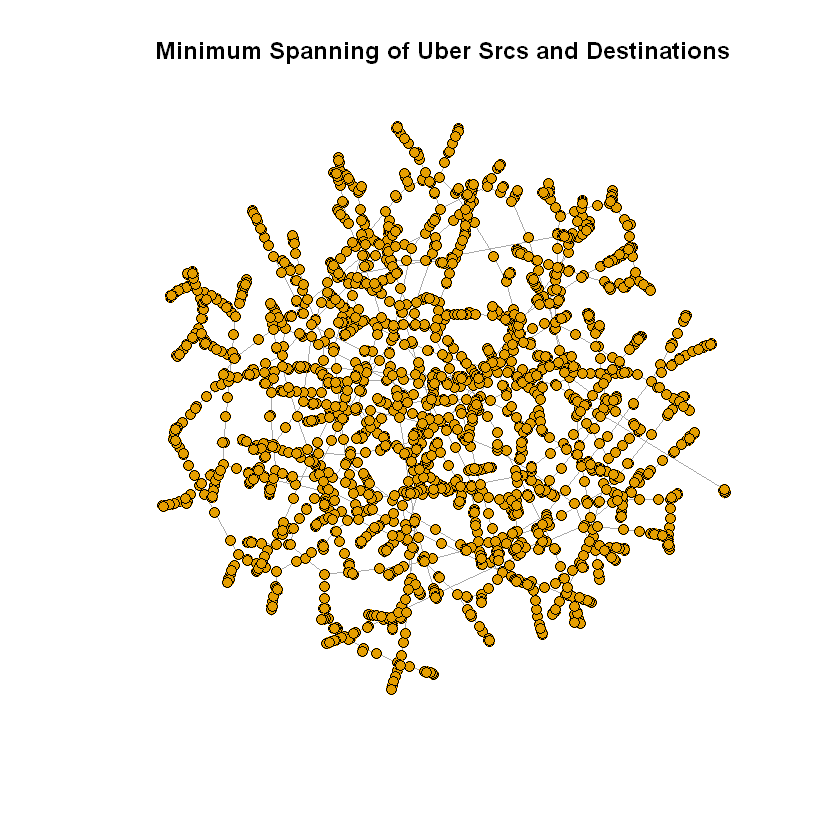

In [31]:
plot(location_graph_simplified_mst,
     vertex.size=4,
     edge.width=0.1,
     vertex.label=NA,
    main="Minimum Spanning of Uber Srcs and Destinations")

In [32]:
vertex_df <- as.data.frame(list(
      V(location_graph_simplified_mst)$name,
      V(location_graph_simplified_mst)$centroid_x,
     V(location_graph_simplified_mst)$centroid_y,
     V(location_graph_simplified_mst)$location_id,
    degree(location_graph_simplified_mst)
     ))
names(vertex_df) <- c('id','lon','lat','name','weight')

In [33]:
edge_df <- as.data.frame(
                        list(
                        get.edgelist(location_graph_simplified_mst),
                        E(location_graph_simplified_mst)$weight,
                        1
                        )
                        )
names(edge_df) <- c("from","to","weight","category")

In [34]:
edges_for_plot <- edge_df %>%
  inner_join(vertex_df %>% select(id, lon, lat), by = c('from' = 'id')) %>%
  rename(x = lon, y = lat) %>%
  inner_join(vertex_df %>% select(id, lon, lat), by = c('to' = 'id')) %>%
  rename(xend = lon, yend = lat)


assert_that(nrow(edges_for_plot) == nrow(edge_df))

[1] TRUE

In [35]:
head(edges_for_plot)

,from,to,weight,category,x,y,xend,yend
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,758,757,69.800,1,-118.5551,34.28130,-118.5420,34.28059
2,758,761,92.030,1,-118.5551,34.28130,-118.5623,34.28554
3,758,776,143.685,1,-118.5551,34.28130,-118.5492,34.26509
4,1197,1195,66.475,1,-118.2072,34.05852,-118.1981,34.05726
5,1197,1199,108.550,1,-118.2072,34.05852,-118.2095,34.05324
6,2652,2653,43.495,1,-118.0792,33.79961,-118.0855,33.78916


## Question 8

In [36]:
triangle_list <-triangles(location_graph_simplified)

In [37]:
triangle_idxs <- seq(1,length(triangle_list),3)

In [38]:
count <- 0
for (k in seq_len(1000)){
    i = sample(triangle_idxs,1)

    idx1 = i
    idx2 = i+1
    idx3 = i+2
    
    v1=triangle_list[idx1]$name
    v2=triangle_list[idx2]$name
    v3=triangle_list[idx3]$name
    
    e1=get.edge.ids(location_graph_simplified,c(v1,v2))
    e2=get.edge.ids(location_graph_simplified,c(v2,v3))
    e3=get.edge.ids(location_graph_simplified,c(v1,v3))
    
    w1=get.edge.attribute(location_graph_simplified,"weight",e1)
    w2=get.edge.attribute(location_graph_simplified,"weight",e2)
    w3=get.edge.attribute(location_graph_simplified,"weight",e3)
    
    if((w1<(w2+w3))&&(w2<(w1+w3))&&(w3<(w1+w2))){
        count<-count+1
    }
}

In [39]:
sprintf("The percentage of triangles in the graph is %.4f",count/1000)

[1] "The percentage of triangles in the graph is 0.9030"

In [40]:
rm(triangle_list)

## Visualization for later

In [41]:
maptheme <- theme(panel.grid = element_blank()) +
  theme(axis.text = element_blank()) +
  theme(axis.ticks = element_blank()) +
  theme(axis.title = element_blank()) +
  theme(legend.position = "bottom") +
  theme(panel.grid = element_blank()) +
  theme(panel.background = element_rect(fill = "#596673")) +
  theme(plot.margin = unit(c(0, 0, 0.5, 0), 'cm'))

In [42]:
country_shapes <- geom_polygon(aes(x = long, y = lat, group = group),
                               data = map_data("county", regions=c("california,los angeles","california,orange")),
                               fill = "#CECECE", color = "#515151",
                               size = 0.15)
#mapcoords <- coord_fixed(xlim = c(-150, 180), ylim = c(-55, 80))

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



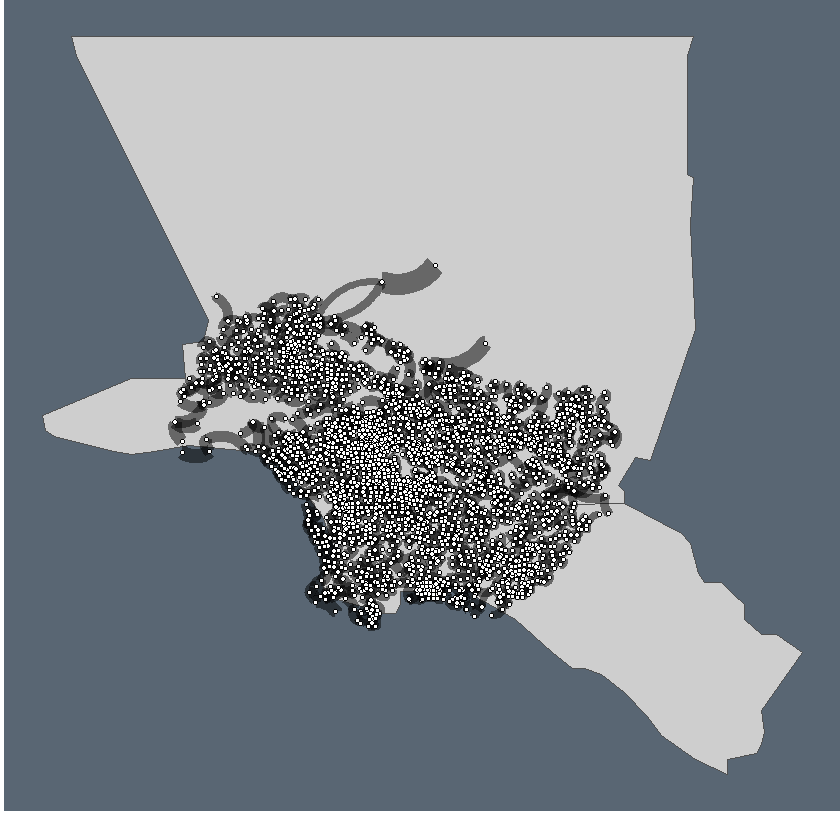

In [43]:
ggplot(vertex_df) + country_shapes +

  geom_curve(aes(x = x, y = y, xend = xend, yend = yend,     # draw edges as arcs
                  size = weight),
             data = edges_for_plot, curvature = 0.33,
             alpha = 0.5) +

  scale_size_continuous(guide = FALSE, range = c(0.2, .5)) + # scale for edge widths

  geom_point(aes(x = lon, y = lat, size = weight),           # draw nodes
             shape = 21, fill = 'white',
             color = 'black', stroke = 0.5) +

  scale_size_continuous(guide = FALSE, range = c(1, 6)) +    # scale for node size

  #geom_text(aes(x = lon, y = lat, label = name),             # draw text labels
  #          hjust = 0, nudge_x = 1, nudge_y = 4,
  #          size = 3, color = "white", fontface = "bold") +
  #mapcoords +
  maptheme

In [47]:
vertex_df

,id,lon,lat,name,weight
,<chr>,<dbl>,<dbl>,<chr>,<dbl>
758,758,-118.5551,34.28130,"19364 Pauma Valley Dr, Northridge, CA 91326, USA",3
1197,1197,-118.2072,34.05852,"2010 Zonal Ave, Los Angeles, CA 90033, USA",2
2652,2652,-118.0792,33.79961,"11272 Loch Lomond Rd, Los Alamitos, CA 90720, USA",3
2427,2427,-118.3711,33.92308,"5234 W 120th St, Hawthorne, CA 90250, USA",2
2653,2653,-118.0855,33.78916,"11931 Wembley Rd, Los Alamitos, CA 90720, USA",2
408,408,-118.3571,33.92764,"4603 W 118th St, Hawthorne, CA 90250, USA",1
757,757,-118.5420,34.28059,"11501 Amigo Ave, Northridge, CA 91326, USA",3
1562,1562,-118.3954,34.04383,"2125 S Beverly Dr, Los Angeles, CA 90034, USA",1
1273,1273,-118.3019,34.07231,"149 S Ardmore Ave, Los Angeles, CA 90004, USA",2


In [52]:
I(2)

[1] 2

In [79]:
geom_segment

ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. rep

In [82]:
geom_segment(data=edges_for_plot,aes(x=x,y=y,
                   xend=xend,yend=yend,
                   color=n.trips),
               size=1,alpha=0.75)

mapping: x = ~x, y = ~y, xend = ~xend, yend = ~yend, colour = ~n.trips 
geom_segment: arrow = NULL, arrow.fill = NULL, lineend = butt, linejoin = round, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

Using zoom = 10...



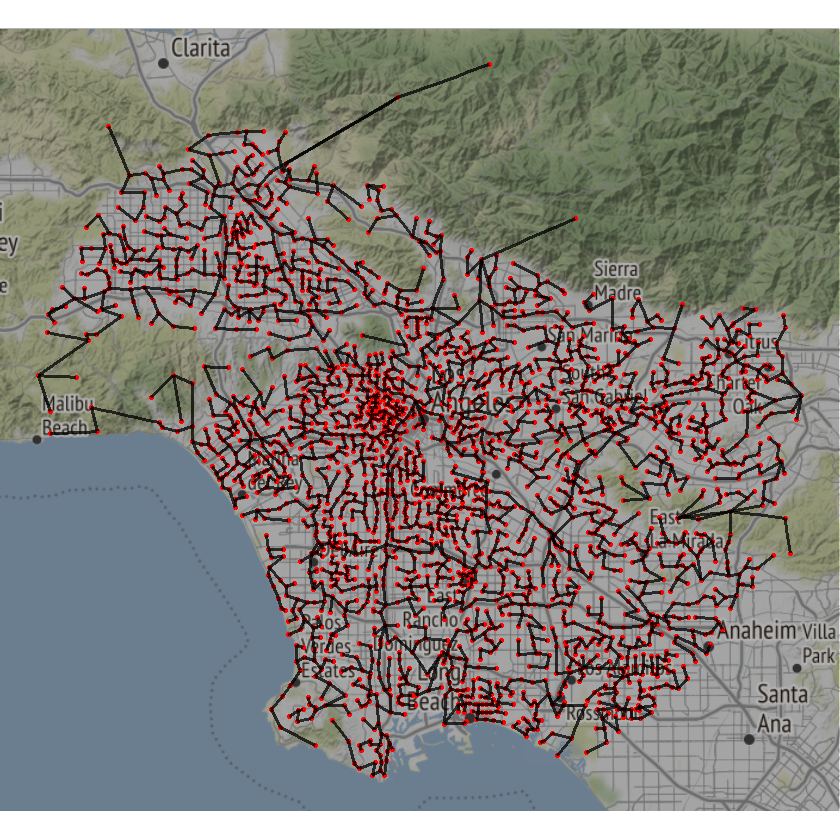

In [85]:
qmplot(lon,lat,data=vertex_df,colour = I('red'), size = I(1), darken = .3) +
geom_segment(data=edges_for_plot,aes(x=x,y=y,
                   xend=xend,yend=yend),
               size=1,alpha=0.75)